In [ ]:
!mkdir datasets
!wget https://www.openslr.org/resources/12/train-clean-100.tar.gz -P datasets/

!tar -xzvf datasets/train-clean-100.tar.gz -C datasets/



Streaming output truncated to the last 5000 lines.
LibriSpeech/train-clean-100/2136/5143/2136-5143-0024.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0012.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0044.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0003.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0010.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0025.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0043.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0004.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0026.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0015.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0032.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0027.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0039.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0020.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0023.flac
LibriSpeech/train-clean-100/2136/5143/2136-5143-0007.flac
LibriSpeech/train-cle

**Our process:**

*   We prepare a dataset of speech samples from different speakers, with the speaker as label.

*   We add background noise to these samples to augment our data.
We take the FFT of these samples.

*   We train a 1D convnet to predict the correct speaker given a noisy FFT speech sample.

In [ ]:
!pip install pydub


  Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)


In [ ]:
import os
from pydub import AudioSegment

# Function to convert FLAC to WAV
def convert_flac_to_wav(input_path, output_path):
    audio = AudioSegment.from_file(input_path, format="flac")
    audio.export(output_path, format="wav")

# Define paths
flac_dir = '/content/datasets/LibriSpeech/train-clean-100'
wav_dir = '/content/speaker-recognition/audio'

# Create the output directory if it doesn't exist
os.makedirs(wav_dir, exist_ok=True)

# Convert all FLAC files to WAV and organize by speaker ID
for root, dirs, files in os.walk(flac_dir):
    for file in files:
        if file.endswith('.flac'):
            # Extract the speaker ID from the source path
            speaker_id = root.split('/')[-2]

            # Create the speaker-specific directory if it doesn't exist
            speaker_dir = os.path.join(wav_dir, speaker_id)
            os.makedirs(speaker_dir, exist_ok=True)

            # Construct input and output paths
            flac_path = os.path.join(root, file)
            wav_path = os.path.join(speaker_dir, file.replace('.flac', '.wav'))

            # Convert FLAC to WAV
            convert_flac_to_wav(flac_path, wav_path)

# Print completion message
print("Conversion from FLAC to WAV completed. Dataset organized by speaker ID.")


Conversion from FLAC to WAV completed. Dataset organized by speaker ID.


In [ ]:
import shutil

# Specify the path to the folder you want to zip
folder_to_zip = '/content/speaker-recognition'

# Specify the path for saving the zip file
zip_file_path = '/content/speaker-recognition.zip'

# Create a zip file
shutil.make_archive(zip_file_path, 'zip', folder_to_zip)

# Move the zip file to /content (optional)
shutil.move(zip_file_path + '.zip', zip_file_path)

# Provide a download link for the zip file
zip_file_path


'/content/speaker-recognition.zip'

In [ ]:
!pip install kaggle


In [ ]:
# remove (if exists) the folder: kaggle
!rm -r ~/.kaggle
# make the folder: kaggle
!mkdir ~/.kaggle
# upload a kaggle.json to Load Kaggle datasets directly into Google Colab
files.upload()
# move kaggle.json file in kaggle folder
!mv ./kaggle.json ~/.kaggle/
# giving read and write access
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import shutil
import os

# Zip the speaker-recognition folder
shutil.make_archive('/content/speaker-recognition', 'zip', '/content/speaker-recognition')

# Move the zip file to /content
shutil.move('/content/speaker-recognition.zip', '/content/speaker-recognition_upload.zip')

# Upload to Kaggle
!kaggle datasets create -p /content -u -r zip -t speaker-recognition_upload.zip


In [ ]:
from google.colab import files

uploaded = files.upload()


In [ ]:
import shutil

# Move the uploaded file to the target directory
uploaded_file_path = list(uploaded.keys())[0]
target_directory = '/content/speaker-recognition/noise/_background_noise_'

shutil.move(uploaded_file_path, target_directory)


In [ ]:
from pydub import AudioSegment

# Function to convert FLAC to WAV
def convert_flac_to_wav(input_path, output_path):
    audio = AudioSegment.from_file(input_path, format="flac")
    audio.export(output_path, format="wav")

# Continue from the existing code
flac_dir = '/content/speaker-recognition/audio'

# Convert all FLAC files to WAV and replace in the same directory
for root, dirs, files in os.walk(flac_dir):
    for file in files:
        if file.endswith('.flac'):
            # Construct input and output paths
            flac_path = os.path.join(root, file)
            wav_path = os.path.join(root, file.replace('.flac', '.wav'))

            # Convert FLAC to WAV
            convert_flac_to_wav(flac_path, wav_path)

            # Remove the original FLAC file
            os.remove(flac_path)

# Print completion message
print("Conversion from FLAC to WAV completed. FLAC files replaced with WAV files.")


KeyboardInterrupt: ignored

In [ ]:
# Remove the now-empty audio directory
shutil.rmtree(flac_dir)

# Rename the audio_wav directory to audio
os.rename('/content/speaker-recognition/audio_wav', '/content/speaker-recognition/audio')

# Print completion message
print("FLAC directory removed, and audio_wav directory renamed to audio.")


In [ ]:
# Import needed libraries
from google.colab import files
import os
from os.path import isfile, join
import numpy as np
import tensorflow as tf
from tensorflow import keras
import shutil
from pathlib import Path
from IPython.display import display, Audio
import subprocess

**Upload your kaggle.json file**

**Download your recorded voice for model trianing.**


In [ ]:
data_directory = "./speaker-recognition"
audio_folder = "audio"
noise_folder = "noise"
# Join two pathname components
audio_path = os.path.join(data_directory, audio_folder)
noise_path = os.path.join(data_directory, noise_folder)

In [ ]:
# set all the parameters for training and other purposes
valid_split = 0.1
shuffle_seed = 43
sample_rate = 16000
scale = 0.5
batch_size = 200 # Batch size does not affect your accuracy. This is just used to control the speed or performance based on the memory in your GPU. If you have huge memory, you can have a huge batch size so training will be faster.
epochs = 8 # Epoch sizes can increase the accuracy up to a certain limit beyond which you begin to overfit your model. Having a very low one will also result in underfitting.

In [ ]:
# Copy dataset to audio and noise folder
for folder in os.listdir(data_directory):
    if os.path.isdir(os.path.join(data_directory, folder)):
        if folder in [audio_folder, noise_folder]:
            continue
        # Copy noise dataset to noise folder
        elif folder in ["other", "_background_noise_"]:
            shutil.move(os.path.join(data_directory, folder),os.path.join(noise_path, folder))
        # Copy speakers' dataset to audio folder
        else:
            shutil.move(os.path.join(data_directory, folder),os.path.join(audio_path, folder))

In [ ]:
# Get the list of all noise files
noise_paths = []
for subdir in os.listdir(noise_path):
    subdir_path = Path(noise_path) / subdir
    if os.path.isdir(subdir_path):
        noise_paths += [os.path.join(subdir_path, filepath) for filepath in os.listdir(subdir_path) if filepath.endswith(".wav")]

In [ ]:
# Split noise into chunks of 16,000 steps each
# Command to execute
command = ("for dir in `ls -1 " + noise_path + "`; do ""for file in `ls -1 " + noise_path + "/$dir/*.wav`; do "
    "sample_rate=`ffprobe -hide_banner -loglevel panic -show_streams " "$file | grep sample_rate | cut -f2 -d=`; "
    "if [ $sample_rate -ne 16000 ]; then " "ffmpeg -hide_banner -loglevel panic -y "
    "-i $file -ar 16000 temp.wav; " "mv temp.wav $file; " "fi; done; done")
# Using os.system() method to execute command
os.system(command)
def load_noise_sample(path):
    # tf.audio.decode_wav: Decode a wav file from its contents.
    #                      Args: input_bytes: a byte array or Tensor with the wav file contents.
    #                      Returns: A pair of Tensor for sample rate, decoded samples.
    sample, sampling_rate = tf.audio.decode_wav(tf.io.read_file(path), desired_channels=1)
    if sampling_rate == sample_rate:
        slices = int(sample.shape[0] / sample_rate)
        # tf.split: Splits a tensor value into a list of sub tensors.
        sample = tf.split(sample[: slices * sample_rate], slices)
        return sample
    else:
        print("Sampling rate for",path, "is incorrect")
        return None
noises = []
for path in noise_paths:
    sample = load_noise_sample(path) # use our load_noise_sample function
    if sample:
        noises.extend(sample) # adds the specified list elements (sample) to the end of the current list (noises)
noises = tf.stack(noises) # Stacks a list of tensors

**DATASET GENERATION**

In [ ]:
# Creat dataset from paths and labels
def paths_and_labels_to_dataset(audio_paths, labels):
    path_ds = tf.data.Dataset.from_tensor_slices(audio_paths) # creates a dataset with a separate element for each row of the input tensor
    audio_ds = path_ds.map(lambda x: path_to_audio(x)) # Maps map_func across the elements of this dataset
    label_ds = tf.data.Dataset.from_tensor_slices(labels)
    return tf.data.Dataset.zip((audio_ds, label_ds))

In [ ]:
def path_to_audio(path):
    audio = tf.io.read_file(path) # This operation returns a tensor with the entire contents of the input filename
    audio, _ = tf.audio.decode_wav(audio, 1, sample_rate) # Decode a 16-bit PCM WAV file to a float tensor (returns a tuple of Tensor objects (audio, sample_rate))
    return audio

In [ ]:
# add noise to dataset
def add_noise(audio, noises=None, scale=scale):
    if noises is not None:
        tf_rnd = tf.random.uniform((tf.shape(audio)[0],), 0, noises.shape[0], dtype=tf.int32) # Outputs random values from a uniform distribution
        noise = tf.gather(noises, tf_rnd, axis=0) # Gather slices from params axis according to indices
        prop = tf.math.reduce_max(audio, axis=1) / tf.math.reduce_max(noise, axis=1) # maximum of elements across dimensions of audio/maximum of elements across dimensions of noise
        prop = tf.repeat(tf.expand_dims(prop, axis=1), tf.shape(audio)[1], axis=1) # Repeat elements of input
        audio = audio + noise * prop * scale
    return audio

# compute fft of the audio
def audio_to_fft(audio):
    audio = tf.squeeze(audio, axis=-1) # Removes dimensions of size 1 from the shape of a tensor
    fft = tf.signal.fft(tf.cast(tf.complex(real=audio, imag=tf.zeros_like(audio)), tf.complex64)    ) # compute the Fast Fourier transform
    fft = tf.expand_dims(fft, axis=-1)  # used to insert an addition dimension in input Tensor (axis=-1 adds an inner most dimension)
    return tf.math.abs(fft[:, : (audio.shape[1] // 2), :]) # Computes the absolute value of a tensor

In [ ]:
# get lables and audio paths
class_names = os.listdir(audio_path)
print(class_names,)

audio_paths = []
labels = []
for label, name in enumerate(class_names):
    print("Speaker:",(name))
    dir_path = Path(audio_path) / name
    speaker_sample_paths = [os.path.join(dir_path, filepath) for filepath in os.listdir(dir_path) if filepath.endswith(".wav")]
    audio_paths += speaker_sample_paths
    labels += [label] * len(speaker_sample_paths)

['445', '3830', '8324', '200', '332', '1363', '1355', '8465', '1867', '5678', '27', '1578', '4297', '730', '1723', '839', '5652', '831', '2002', '8312', '7312', '1737', '8797', '4340', '3259', '7367', '7278', '328', '2893', '7226', '7302', '8063', '5163', '1034', '7635', '311', '1553', '8419', '211', '6925', '8630', '1116', '2910', '6836', '5104', '1963', '3807', '8123', '1088', '1926', '5463', '5789', '3947', '201', '150', '8226', '1455', '4441', '6209', '5750', '4640', '1263', '322', '4898', '426', '441', '374', '40', '4481', '4859', '1898', '458', '6019', '302', '5808', '298', '4267', '3235', '4051', '911', '6476', '3699', '2843', '2136', '2416', '3723', '6880', '8770', '5561', '307', '1069', '8468', '2764', '2196', '6437', '3214', '6367', '909', '1081', '887', '7078', '5339', '7447', '2092', '7059', '669', '1447', '2289', '8014', '163', '1235', '6078', '248', '8108', '7800', '7264', '405', '8095', '39', '2817', '7794', '60', '2007', '7511', '3664', '1334', '4195', '8088', '32', '18

In [ ]:
# Shuffle to generate random data
rng = np.random.RandomState(shuffle_seed) # RandomState exposes a number of methods for generating random numbers drawn from a variety of probability distributions. Argument: seed used to initialize the pseudo-random number generator
rng.shuffle(audio_paths) # shuffles the array along the first axis of a multi-dimensional array
rng = np.random.RandomState(shuffle_seed) # exposes a number of methods for generating random numbers drawn from a variety of probability distributions
rng.shuffle(labels) # shuffling its contents

In [ ]:
# Split into training and validation
num_val_samples = int(valid_split * len(audio_paths))
train_audio_paths = audio_paths[:-num_val_samples]
train_labels = labels[:-num_val_samples]

valid_audio_paths = audio_paths[-num_val_samples:]
valid_labels = labels[-num_val_samples:]

In [ ]:
# Create datasets, one for training and the other for validation
train_ds = paths_and_labels_to_dataset(train_audio_paths, train_labels)
train_ds = train_ds.shuffle(buffer_size=batch_size * 8, seed=shuffle_seed).batch(batch_size)

valid_ds = paths_and_labels_to_dataset(valid_audio_paths, valid_labels)
valid_ds = valid_ds.shuffle(buffer_size=32 * 8, seed=shuffle_seed).batch(32)

In [ ]:
type(valid_ds)

tensorflow.python.data.ops.batch_op._BatchDataset

**feature Extraction**

In [ ]:
# Add noise to the training set
train_ds = train_ds.map(lambda x, y: (add_noise(x, noises, scale=scale), y),num_parallel_calls=tf.data.experimental.AUTOTUNE)
# Transform audio wave to the frequency domain using `audio_to_fft`
train_ds = train_ds.map(lambda x, y: (audio_to_fft(x), y), num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)

valid_ds = valid_ds.map(lambda x, y: (audio_to_fft(x), y), num_parallel_calls=tf.data.experimental.AUTOTUNE)
valid_ds = valid_ds.prefetch(tf.data.experimental.AUTOTUNE)

**Model**

Keras layers API
Layers are the basic building blocks of neural networks in Keras. A layer consists of a tensor-in tensor-out computation function (the layer's call method) and some state, held in TensorFlow variables (the layer's weights).

A Layer instance is callable, much like a function. Unlike a function, though, layers maintain a state, updated when the layer receives data during training, and stored in layer.weights.

Creating custom layers
While Keras offers a wide range of built-in layers, they don't cover ever possible use case. Creating custom layers is very common, and very easy.


In [ ]:
from tensorflow.keras.layers import Conv1D

In [ ]:
# keras model
def residual_block(x, filters, conv_num=3, activation="relu"):
    # Shortcut
    s = keras.layers.Conv1D(filters, 1, padding="same")(x)
    for i in range(conv_num - 1):
        x = keras.layers.Conv1D(filters, 3, padding="same")(x)
        x = keras.layers.Activation(activation)(x)
    x = keras.layers.Conv1D(filters, 3, padding="same")(x)
    x = keras.layers.Add()([x, s])
    x = keras.layers.Activation(activation)(x)
    return keras.layers.MaxPool1D(pool_size=2, strides=2)(x)


def build_model(input_shape, num_classes):
    inputs = keras.layers.Input(shape=input_shape, name="input")

    x = residual_block(inputs, 16, 2)
    x = residual_block(x, 32, 2)
    x = residual_block(x, 64, 3)
    x = residual_block(x, 128, 3)
    x = residual_block(x, 128, 3)

    x = keras.layers.AveragePooling1D(pool_size=3, strides=3)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(256, activation="relu")(x)
    x = keras.layers.Dense(128, activation="relu")(x)

    outputs = keras.layers.Dense(num_classes, activation="softmax", name="output")(x)

    return keras.models.Model(inputs=inputs, outputs=outputs)


model = build_model((sample_rate // 2, 1), len(class_names))

model.summary()

# Compile the model using Adam's default learning rate
model.compile(
    optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Add callbacks:
# 'EarlyStopping' to stop training when the model is not enhancing anymore
# 'ModelCheckPoint' to always keep the model that has the best val_accuracy
model_save_filename = "model.h5"

earlystopping_cb = keras.callbacks.EarlyStopping(patience=35, restore_best_weights=True)
mdlcheckpoint_cb = keras.callbacks.ModelCheckpoint(
    model_save_filename, monitor="val_accuracy", save_best_only=True
)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 8000, 1)]            0         []                            
                                                                                                  
 conv1d_1 (Conv1D)           (None, 8000, 16)             64        ['input[0][0]']               
                                                                                                  
 activation (Activation)     (None, 8000, 16)             0         ['conv1d_1[0][0]']            
                                                                                                  
 conv1d_2 (Conv1D)           (None, 8000, 16)             784       ['activation[0][0]']          
                                                                                              

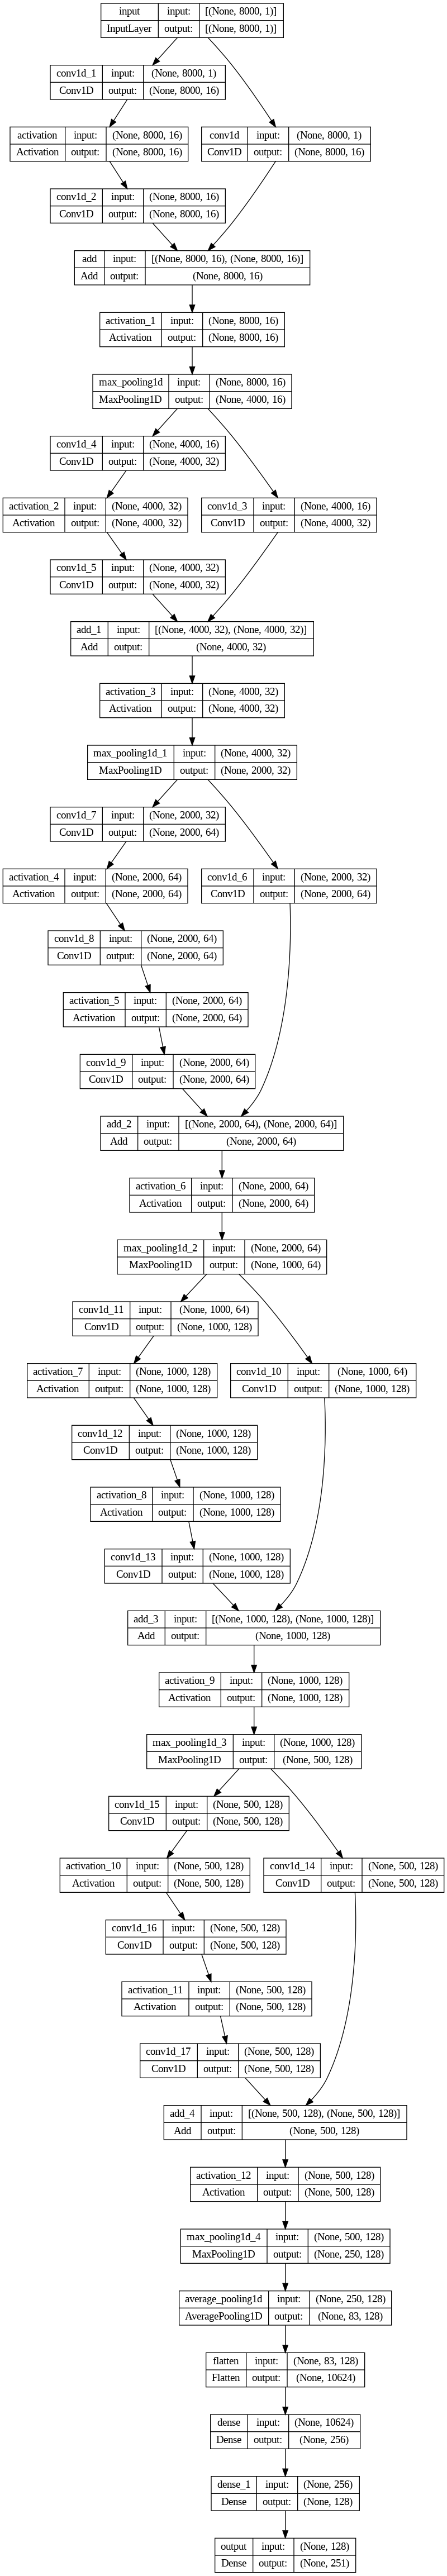

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# our model
def residual_block(x, filters, conv_num = 3, activation = "relu"):
    """
     1D convolution layer:
     This layer creates a convolution kernel that is convolved with the layer
     input over a single spatial (or temporal) dimension to produce a tensor of outputs.
     Arguments:
     filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
     Kernel size: specifying the length of the 1D convolution window
     padding: "same" results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
    """
    s = keras.layers.Conv1D(filters, 1, padding = "same")(x)

    for i in range(conv_num - 1):
        x = keras.layers.Conv1D(filters, 3, padding = "same")(x)
        x = keras.layers.Activation(activation)(x) # Applies an activation function to an output.

    x = keras.layers.Conv1D(filters, 3, padding = "same")(x)
    x = keras.layers.Add()([x, s]) # Layer that adds a list of inputs.It takes as input a list of tensors, all of the same shape, and returns a single tensor (also of the same shape).
    x = keras.layers.Activation(activation)(x)

    return keras.layers.MaxPool1D(pool_size = 2, strides = 2)(x) # Max pooling operation for 1D temporal data.

def build_model(input_shape, num_classes):
    inputs = keras.layers.Input(shape = input_shape, name = "input") # used to instantiate a Keras tensor (shape: A shape tuple, name: An optional name string for the layer)

    x = residual_block(inputs, 16, 2) # our residual_block function: (x, filters, conv_num, activation = "relu")
    x = residual_block(inputs, 32, 2)
    x = residual_block(inputs, 64, 3)
    x = residual_block(inputs, 128, 3)
    x = residual_block(inputs, 128, 3)
    x = keras.layers.AveragePooling1D(pool_size=3, strides=3)(x) # Average pooling for temporal data.
    x = keras.layers.Flatten()(x) # Flattens the input.
    x = keras.layers.Dense(256, activation="relu")(x) # Dense Layer is used to classify image based on output from convolutional layers.
    x = keras.layers.Dense(128, activation="relu")(x)

    outputs = keras.layers.Dense(num_classes, activation = "softmax", name = "output")(x)

    return keras.models.Model(inputs = inputs, outputs = outputs)

# We have used the same model as recommended for peaker recognition in https://keras.io/examples/audio/speaker_recognition_using_cnn
# Becuase it worked well with our dataset aswell
model = build_model((sample_rate // 2, 1), len(class_names)) # run our build model function

model.summary() # see model summery

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) # Configures the model for training.

model_save_filename = "model.h5"

earlystopping_cb = keras.callbacks.EarlyStopping(patience=35, restore_best_weights=True) # Stop training when a monitored metric has stopped improving.

mdlcheckpoint_cb = keras.callbacks.ModelCheckpoint(model_save_filename, monitor="val_accuracy", save_best_only=True) # Callback to save the Keras model or model weights at some frequency.

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 8000, 1)]            0         []                            
                                                                                                  
 conv1d_33 (Conv1D)          (None, 8000, 128)            512       ['input[0][0]']               
                                                                                                  
 activation_23 (Activation)  (None, 8000, 128)            0         ['conv1d_33[0][0]']           
                                                                                                  
 conv1d_34 (Conv1D)          (None, 8000, 128)            49280     ['activation_23[0][0]']       
                                                                                            

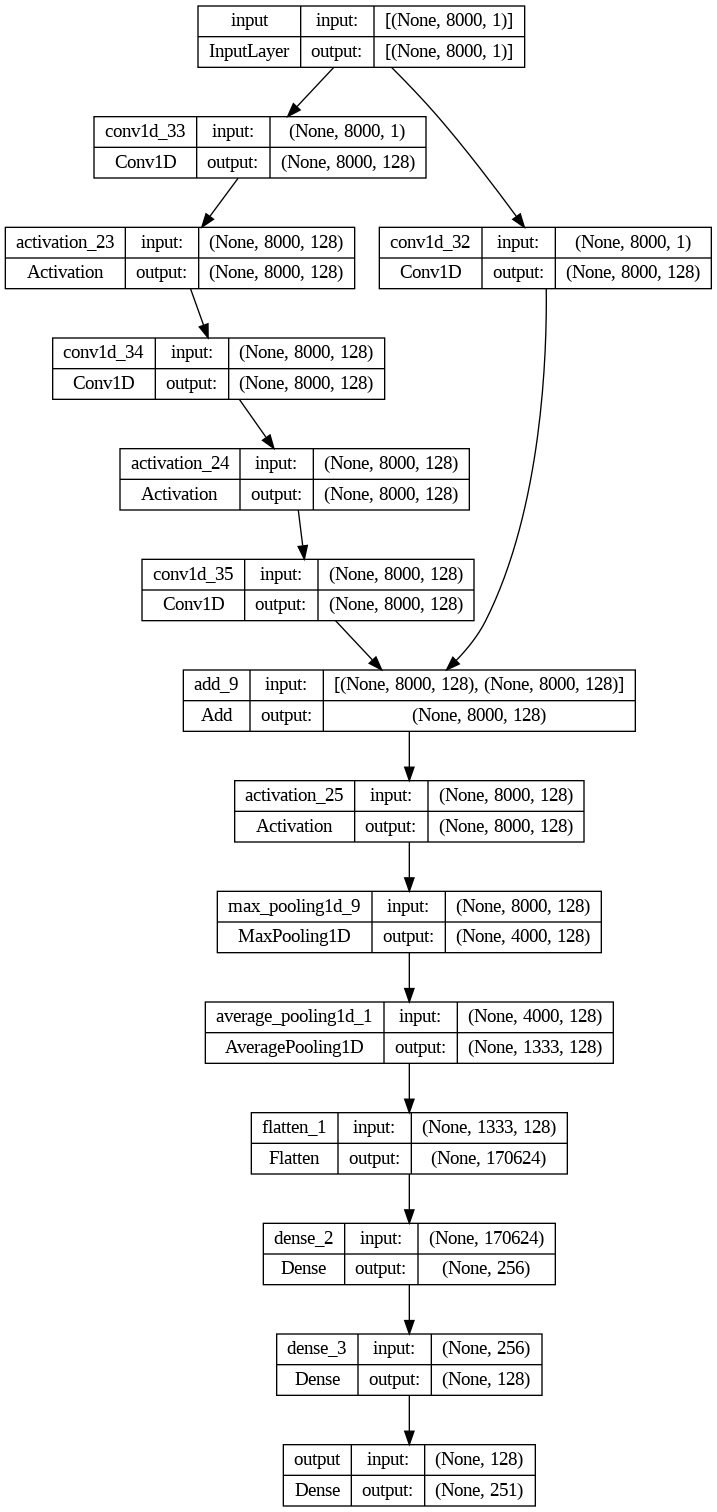

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

**Training**

In [ ]:
history = model.fit(train_ds,epochs=epochs,validation_data=valid_ds,callbacks=[earlystopping_cb, mdlcheckpoint_cb])

Epoch 1/8
 27/129 [=====>........................] - ETA: 47:47 - loss: 5.4973 - accuracy: 0.0115

**Accuracy**

In [ ]:
print("Loss and Accuracy of model:",model.evaluate(valid_ds)) # evaluate model performance. Higher accuracy and lower loss is better

**Predict the speaker from the test dataset for real time prediction.**

In [ ]:
#def paths_to_dataset(audio_paths):
#    path_ds = tf.data.Dataset.from_tensor_slices(audio_paths)
#    return tf.data.Dataset.zip((path_ds))

def predict(path, labels):
    test = paths_and_labels_to_dataset(path, labels) # use our paths_and_labels_to_dataset function
    test = test.batch(batch_size) # batch dataset
    test = test.prefetch(tf.data.experimental.AUTOTUNE) # Creates a Dataset that prefetches elements from this dataset
    #test = test.map(lambda x, y: (add_noise(x, noises, scale=scale), y))
    for audios, labels in test.take(1):
        ffts = audio_to_fft(audios) # use our audio_to_fft function
        y_pred = model.predict(ffts) # prediction
        print("Similarity to Nabil, Zohreh and Navid respectively:",y_pred[0])
        index = np.argmax(y_pred[0]) # we choose the class with highest probability as our prediction result
        if y_pred[0][index]>0.9:
          print("So \nSpeaker Predicted:",class_names[index])
        else:
          print("New person. (We are not 90% sure!)")


**Now provide your test file for real time prediction:**

In [ ]:
!kaggle datasets download rsm2213839/hello1 # download from kaggle
#files.upload() # or upload from pc

In [ ]:
! unzip hello1.zip # unzip file

In [ ]:
cwd = os.getcwd()
cwd

In [ ]:
path = ["/content/Hello-Zohreh.wav"]
labels = ["unknown"]
predict(path, labels) # make prediction

**Predicted one new data from Zohreh successfully!**

uncomment the two following cells if you want to upload a new 1 second file for prediction.

In [ ]:
#files.upload()

In [ ]:
#path = ["../content/chunk7.wav"]
#labels = ["unknown"]
#predict(path, labels) # make prediction

**Note:**

Now we try another recording which is about 8 seconds and we will consider our predictions for all its seconds and then make our final desicion based on all the seconds. If our prediction for more than **90 percent of the seconds** is an identical person, we will announce this person as our Final decision. Otherwise we will conclude that this voice is from a **new person**.

**Upload your zip file:**


In [ ]:
!kaggle datasets download rsm2213839/new-person-test

In [ ]:
#files.upload()

In [ ]:
! unzip new-person-test.zip

In [ ]:
! pip install glob2
import glob2
name = glob2.glob('content/new/splited/*.wav')

**Change path in the next cell to the uploaded file name**


In [ ]:
#SAMPLES_TO_DISPLAY = 1
os.chdir("content/new/splited") # change directory
labels = [""]
seconds = len(name)
conclusion = np.zeros(seconds) + 3

for sec in range(seconds):
  path = name[sec]
  mylen = len('content/new/splited/')
  path = path[mylen:]
  path = [path]
  test = paths_and_labels_to_dataset(path, labels) # use our paths_and_labels_to_dataset function
  test = test.batch(batch_size) # batch dataset
  test = test.prefetch(tf.data.experimental.AUTOTUNE) # Creates a Dataset that prefetches elements from this dataset
  for audios, labels in test.take(1):
      ffts = audio_to_fft(audios) # use our audio_to_fft function
      y_pred = model.predict(ffts) # prediction
      print("Similarity to Nabil, Zohreh and Navid respectively:",y_pred[0])
      index = np.argmax(y_pred[0]) # we choose the class with highest probability as our prediction result
      if y_pred[0][index]>0.95:
        conclusion[sec] = index

print("Conclusion for each second: " )
for sec in range(seconds):
  if conclusion[sec]<3:
    print(sec, "- ", class_names[int(conclusion[sec])])
  else:
    print(sec, "- ", 'New person')
num0 = 0
num1 = 0
num2 = 0
num3 = 0
for i in range(seconds):
  if conclusion[i]==0:
    num0 = num0 +1
  if conclusion[i]==1:
    num1 = num1 +1
  if conclusion[i]==2:
    num2 = num2 +1
  if conclusion[i]==3:
    num3 = num3 +1
numall = [num0, num1, num2, num3]
IndF = np.argmax(numall)
if max(numall) > (0.9*seconds) :
  print("Final decision: ", class_names[IndF])
else:
  print("Final decision: New person")
os.chdir('/content') # change directory

**Note:**

Since the accuracy of our model is about 96%, if the uploaded voice belongs to a team member, it should predict the speaker's name correctly almost every second.

So when we see that this is not the case almost every second, it is reasonable to consider the voice as belonging to a new person.

In [ ]:
os.chdir('/content') # change directory

**Predict sample in validation data**

In [ ]:
SAMPLES_TO_DISPLAY = 10

test_ds = paths_and_labels_to_dataset(valid_audio_paths, valid_labels) # use our paths_and_labels_to_dataset function
test_ds = test_ds.shuffle(buffer_size=batch_size * 8, seed=shuffle_seed).batch(batch_size) # shuffle and batch dataset

for audios, labels in test_ds.take(1):
    ffts = audio_to_fft(audios) # use our audio_to_fft function
    y_pred = model.predict(ffts) # make predictions
    rnd = np.random.randint(0, batch_size, SAMPLES_TO_DISPLAY) # Returns random integers from low to high
    audios0 = audios.numpy()[rnd, :, :] # converts a tensor object into an numpy.ndarray object
    labels0 = labels.numpy()[rnd] # converts a tensor object into an numpy.ndarray object
    y_pred = y_pred[rnd]
    y_pred_ind = np.argmax(y_pred, axis=-1) # we choose the class with highest probability as our prediction result
    print("y_pred_ind: ",y_pred_ind)
    numm = 0
    for i in range(SAMPLES_TO_DISPLAY):
        print("Speaker:\33{} {}\33[0m\tPredicted:\33{} {}\33[0m".format(
                "[92m" if labels0[i] == y_pred_ind[i] else "[91m",class_names[labels0[i]],
                "[92m" if labels0[i] == y_pred_ind[i] else "[91m",class_names[y_pred_ind[i]]))
        if labels0[i] ==y_pred_ind[i]:
            print("Yay! Correct recognition. Similarity to Nabil, Zohreh and Navid respectivevly: ", y_pred[i])
        else:
            print("Sorry. Wrong recognition. Similarity to Nabil, Zohreh and Navid respectivevly: ", y_pred[i])


**Note:**

If you want to test with another file upload the output file from  SplitToOneSec-v3.ipynb.

Then change the file name .

In [ ]:
shutil.rmtree('content/new/splited')

In [ ]:
files.upload()
! unzip OneSecFiles.zip

In [ ]:
name = glob2.glob('content/new/splited/*.wav')
#os.chdir("content") # change directory
os.chdir("content/new/splited") # change directory
labels = [""]
seconds = len(name)
conclusion = np.zeros(seconds) + 3

for sec in range(seconds):
  path = name[sec]
  mylen = len('content/new/splited/')
  path = path[mylen:]
  path = [path]
  test = paths_and_labels_to_dataset(path, labels) # use our paths_and_labels_to_dataset function
  test = test.batch(batch_size) # batch dataset
  test = test.prefetch(tf.data.experimental.AUTOTUNE) # Creates a Dataset that prefetches elements from this dataset
  for audios, labels in test.take(1):
      ffts = audio_to_fft(audios) # use our audio_to_fft function
      y_pred = model.predict(ffts) # prediction
      print("Similarity to Nabil, Zohreh and Navid respectively:",y_pred[0])
      index = np.argmax(y_pred[0]) # we choose the class with highest probability as our prediction result
      if y_pred[0][index]>0.9:
        conclusion[sec] = index

print("Conclusion for each second: " )
for sec in range(seconds):
  if conclusion[sec]<3:
    print(sec, "- ", class_names[int(conclusion[sec])])
  else:
    print(sec, "- ", 'New person')
num0 = 0
num1 = 0
num2 = 0
num3 = 0
for i in range(seconds):
  if conclusion[i]==0:
    num0 = num0 +1
  if conclusion[i]==1:
    num1 = num1 +1
  if conclusion[i]==2:
    num2 = num2 +1
  if conclusion[i]==3:
    num3 = num3 +1
numall = [num0, num1, num2, num3]
IndF = np.argmax(numall)
if max(numall) > (0.9*seconds) :
  print("Final decision: ", class_names[IndF])
else:
  print("Final decision: New person")
os.chdir('/content') # change directory

In [ ]:
#shutil.rmtree('content')
#shutil.rmtree('speaker-recognition')
#os.remove('Hello-Zohreh.wav')
#os.remove('hello1.zip')
#os.remove('model.h5')
#os.remove('new-person-test.zip')
#os.remove('testfilespeakerrec.zip')
#os.remove('3speakerswithnoise2.zip')

In [ ]:
# our model
def residual_block(x, filters, conv_num = 3, activation = "relu"):
    """
     1D convolution layer:
     This layer creates a convolution kernel that is convolved with the layer
     input over a single spatial (or temporal) dimension to produce a tensor of outputs.
     Arguments:
     filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
     Kernel size: specifying the length of the 1D convolution window
     padding: "same" results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
    """
    s = keras.layers.Conv1D(filters, 1, padding = "same")(x)

    for i in range(conv_num - 1):
        x = keras.layers.Conv1D(filters, 3, padding = "same")(x)
        x = keras.layers.Activation(activation)(x) # Applies an activation function to an output.

    x = keras.layers.Conv1D(filters, 3, padding = "same")(x)
    x = keras.layers.Add()([x, s]) # Layer that adds a list of inputs.It takes as input a list of tensors, all of the same shape, and returns a single tensor (also of the same shape).
    x = keras.layers.Activation(activation)(x)

    return keras.layers.MaxPool1D(pool_size = 2, strides = 2)(x) # Max pooling operation for 1D temporal data.

def build_model(input_shape, num_classes):
    inputs = keras.layers.Input(shape = input_shape, name = "input") # used to instantiate a Keras tensor (shape: A shape tuple, name: An optional name string for the layer)

    x = residual_block(inputs, 16, 2) # our residual_block function: (x, filters, conv_num, activation = "relu")
    x = residual_block(inputs, 32, 2)
    x = residual_block(inputs, 64, 3)
    x = residual_block(inputs, 128, 3)
    x = residual_block(inputs, 128, 3)
    x = keras.layers.AveragePooling1D(pool_size=3, strides=3)(x) # Average pooling for temporal data.
    x = keras.layers.Flatten()(x) # Flattens the input.
    x = keras.layers.Dense(256, activation="relu")(x) # Dense Layer is used to classify image based on output from convolutional layers.
    x = keras.layers.Dense(128, activation="relu")(x)

    outputs = keras.layers.Dense(num_classes, activation = "softmax", name = "output")(x)

    return keras.models.Model(inputs = inputs, outputs = outputs)

# We have used the same model as recommended for peaker recognition in https://keras.io/examples/audio/speaker_recognition_using_cnn
# Becuase it worked well with our dataset aswell
model = build_model((sample_rate // 2, 1), len(class_names)) # run our build model function

model.summary() # see model summery

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) # Configures the model for training.

model_save_filename = "model.h5"

earlystopping_cb = keras.callbacks.EarlyStopping(patience=35, restore_best_weights=True) # Stop training when a monitored metric has stopped improving.

mdlcheckpoint_cb = keras.callbacks.ModelCheckpoint(model_save_filename, monitor="val_accuracy", save_best_only=True) # Callback to save the Keras model or model weights at some frequency.

In [ ]:
# Speaker recognition of a team
# Team members: Navid, Zohreh, Nabil

**Our process:**

*   We prepare a dataset of speech samples from different speakers, with the speaker as label.

*   We add background noise to these samples to augment our data.
We take the FFT of these samples.

*   We train a 1D convnet to predict the correct speaker given a noisy FFT speech sample.

In [ ]:
# install Kaggle library to import our dataset from https://kaggle.com/
!pip install Kaggle

In [ ]:
# Import needed libraries
from google.colab import files
import os
from os.path import isfile, join
import numpy as np
import tensorflow as tf
from tensorflow import keras
import shutil
from pathlib import Path
from IPython.display import display, Audio
import subprocess

In [ ]:
# remove (if exists) the folder: kaggle
!rm -r ~/.kaggle
# make the folder: kaggle
!mkdir ~/.kaggle

**Upload your kaggle.json file**

In [ ]:
# upload a kaggle.json to Load Kaggle datasets directly into Google Colab
files.upload()

In [ ]:
# move kaggle.json file in kaggle folder
!mv ./kaggle.json ~/.kaggle/
# giving read and write access
!chmod 600 ~/.kaggle/kaggle.json

**Download your recorded voice for model trianing.**


In [ ]:
# download our dataset from https://www.kaggle.com/datasets/rsm2213839/3speakerswithnoise2
!kaggle datasets download rsm2213839/3speakerswithnoise2

In [ ]:
# unzip the downloaded dataset: speaker-recognition.zip
! unzip 3speakerswithnoise2.zip

In [ ]:
data_directory = "./speaker-recognition"
audio_folder = "audio"
noise_folder = "noise"
# Join two pathname components
audio_path = os.path.join(data_directory, audio_folder)
noise_path = os.path.join(data_directory, noise_folder)

In [ ]:
# set all the parameters for training and other purposes
valid_split = 0.1
shuffle_seed = 43
sample_rate = 16000
scale = 0.5
batch_size = 200 # Batch size does not affect your accuracy. This is just used to control the speed or performance based on the memory in your GPU. If you have huge memory, you can have a huge batch size so training will be faster.
epochs = 40 # Epoch sizes can increase the accuracy up to a certain limit beyond which you begin to overfit your model. Having a very low one will also result in underfitting.

In [ ]:
# Copy dataset to audio and noise folder
for folder in os.listdir(data_directory):
    if os.path.isdir(os.path.join(data_directory, folder)):
        if folder in [audio_folder, noise_folder]:
            continue
        # Copy noise dataset to noise folder
        elif folder in ["other", "_background_noise_"]:
            shutil.move(os.path.join(data_directory, folder),os.path.join(noise_path, folder))
        # Copy speakers' dataset to audio folder
        else:
            shutil.move(os.path.join(data_directory, folder),os.path.join(audio_path, folder))

In [ ]:
# Get the list of all noise files
noise_paths = []
for subdir in os.listdir(noise_path):
    subdir_path = Path(noise_path) / subdir
    if os.path.isdir(subdir_path):
        noise_paths += [os.path.join(subdir_path, filepath) for filepath in os.listdir(subdir_path) if filepath.endswith(".wav")]

In [ ]:
# Split noise into chunks of 16,000 steps each
# Command to execute
command = ("for dir in `ls -1 " + noise_path + "`; do ""for file in `ls -1 " + noise_path + "/$dir/*.wav`; do "
    "sample_rate=`ffprobe -hide_banner -loglevel panic -show_streams " "$file | grep sample_rate | cut -f2 -d=`; "
    "if [ $sample_rate -ne 16000 ]; then " "ffmpeg -hide_banner -loglevel panic -y "
    "-i $file -ar 16000 temp.wav; " "mv temp.wav $file; " "fi; done; done")
# Using os.system() method to execute command
os.system(command)
def load_noise_sample(path):
    # tf.audio.decode_wav: Decode a wav file from its contents.
    #                      Args: input_bytes: a byte array or Tensor with the wav file contents.
    #                      Returns: A pair of Tensor for sample rate, decoded samples.
    sample, sampling_rate = tf.audio.decode_wav(tf.io.read_file(path), desired_channels=1)
    if sampling_rate == sample_rate:
        slices = int(sample.shape[0] / sample_rate)
        # tf.split: Splits a tensor value into a list of sub tensors.
        sample = tf.split(sample[: slices * sample_rate], slices)
        return sample
    else:
        print("Sampling rate for",path, "is incorrect")
        return None
noises = []
for path in noise_paths:
    sample = load_noise_sample(path) # use our load_noise_sample function
    if sample:
        noises.extend(sample) # adds the specified list elements (sample) to the end of the current list (noises)
noises = tf.stack(noises) # Stacks a list of tensors

**DATASET GENERATION**

In [ ]:
# Creat dataset from paths and labels
def paths_and_labels_to_dataset(audio_paths, labels):
    path_ds = tf.data.Dataset.from_tensor_slices(audio_paths) # creates a dataset with a separate element for each row of the input tensor
    audio_ds = path_ds.map(lambda x: path_to_audio(x)) # Maps map_func across the elements of this dataset
    label_ds = tf.data.Dataset.from_tensor_slices(labels)
    return tf.data.Dataset.zip((audio_ds, label_ds))

In [ ]:
def path_to_audio(path):
    audio = tf.io.read_file(path) # This operation returns a tensor with the entire contents of the input filename
    audio, _ = tf.audio.decode_wav(audio, 1, sample_rate) # Decode a 16-bit PCM WAV file to a float tensor (returns a tuple of Tensor objects (audio, sample_rate))
    return audio

In [ ]:
# add noise to dataset
def add_noise(audio, noises=None, scale=scale):
    if noises is not None:
        tf_rnd = tf.random.uniform((tf.shape(audio)[0],), 0, noises.shape[0], dtype=tf.int32) # Outputs random values from a uniform distribution
        noise = tf.gather(noises, tf_rnd, axis=0) # Gather slices from params axis according to indices
        prop = tf.math.reduce_max(audio, axis=1) / tf.math.reduce_max(noise, axis=1) # maximum of elements across dimensions of audio/maximum of elements across dimensions of noise
        prop = tf.repeat(tf.expand_dims(prop, axis=1), tf.shape(audio)[1], axis=1) # Repeat elements of input
        audio = audio + noise * prop * scale
    return audio

# compute fft of the audio
def audio_to_fft(audio):
    audio = tf.squeeze(audio, axis=-1) # Removes dimensions of size 1 from the shape of a tensor
    fft = tf.signal.fft(tf.cast(tf.complex(real=audio, imag=tf.zeros_like(audio)), tf.complex64)    ) # compute the Fast Fourier transform
    fft = tf.expand_dims(fft, axis=-1)  # used to insert an addition dimension in input Tensor (axis=-1 adds an inner most dimension)
    return tf.math.abs(fft[:, : (audio.shape[1] // 2), :]) # Computes the absolute value of a tensor

In [ ]:
# get lables and audio paths
class_names = os.listdir(audio_path)
print(class_names,)

audio_paths = []
labels = []
for label, name in enumerate(class_names):
    print("Speaker:",(name))
    dir_path = Path(audio_path) / name
    speaker_sample_paths = [os.path.join(dir_path, filepath) for filepath in os.listdir(dir_path) if filepath.endswith(".wav")]
    audio_paths += speaker_sample_paths
    labels += [label] * len(speaker_sample_paths)

In [ ]:
# Shuffle to generate random data
rng = np.random.RandomState(shuffle_seed) # RandomState exposes a number of methods for generating random numbers drawn from a variety of probability distributions. Argument: seed used to initialize the pseudo-random number generator
rng.shuffle(audio_paths) # shuffles the array along the first axis of a multi-dimensional array
rng = np.random.RandomState(shuffle_seed) # exposes a number of methods for generating random numbers drawn from a variety of probability distributions
rng.shuffle(labels) # shuffling its contents

In [ ]:
# Split into training and validation
num_val_samples = int(valid_split * len(audio_paths))
train_audio_paths = audio_paths[:-num_val_samples]
train_labels = labels[:-num_val_samples]

valid_audio_paths = audio_paths[-num_val_samples:]
valid_labels = labels[-num_val_samples:]

In [ ]:
# Create datasets, one for training and the other for validation
train_ds = paths_and_labels_to_dataset(train_audio_paths, train_labels)
train_ds = train_ds.shuffle(buffer_size=batch_size * 8, seed=shuffle_seed).batch(batch_size)

valid_ds = paths_and_labels_to_dataset(valid_audio_paths, valid_labels)
valid_ds = valid_ds.shuffle(buffer_size=32 * 8, seed=shuffle_seed).batch(32)

In [ ]:
type(valid_ds)

**feature Extraction**

In [ ]:
# Add noise to the training set
train_ds = train_ds.map(lambda x, y: (add_noise(x, noises, scale=scale), y),num_parallel_calls=tf.data.experimental.AUTOTUNE)
# Transform audio wave to the frequency domain using `audio_to_fft`
train_ds = train_ds.map(lambda x, y: (audio_to_fft(x), y), num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)

valid_ds = valid_ds.map(lambda x, y: (audio_to_fft(x), y), num_parallel_calls=tf.data.experimental.AUTOTUNE)
valid_ds = valid_ds.prefetch(tf.data.experimental.AUTOTUNE)

**Model**

Keras layers API
Layers are the basic building blocks of neural networks in Keras. A layer consists of a tensor-in tensor-out computation function (the layer's call method) and some state, held in TensorFlow variables (the layer's weights).

A Layer instance is callable, much like a function. Unlike a function, though, layers maintain a state, updated when the layer receives data during training, and stored in layer.weights.

Creating custom layers
While Keras offers a wide range of built-in layers, they don't cover ever possible use case. Creating custom layers is very common, and very easy.


In [ ]:
from tensorflow.keras.layers import Conv1D

In [ ]:
# keras model
def residual_block(x, filters, conv_num=3, activation="relu"):
    # Shortcut
    s = keras.layers.Conv1D(filters, 1, padding="same")(x)
    for i in range(conv_num - 1):
        x = keras.layers.Conv1D(filters, 3, padding="same")(x)
        x = keras.layers.Activation(activation)(x)
    x = keras.layers.Conv1D(filters, 3, padding="same")(x)
    x = keras.layers.Add()([x, s])
    x = keras.layers.Activation(activation)(x)
    return keras.layers.MaxPool1D(pool_size=2, strides=2)(x)


def build_model(input_shape, num_classes):
    inputs = keras.layers.Input(shape=input_shape, name="input")

    x = residual_block(inputs, 16, 2)
    x = residual_block(x, 32, 2)
    x = residual_block(x, 64, 3)
    x = residual_block(x, 128, 3)
    x = residual_block(x, 128, 3)

    x = keras.layers.AveragePooling1D(pool_size=3, strides=3)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(256, activation="relu")(x)
    x = keras.layers.Dense(128, activation="relu")(x)

    outputs = keras.layers.Dense(num_classes, activation="softmax", name="output")(x)

    return keras.models.Model(inputs=inputs, outputs=outputs)


model = build_model((sample_rate // 2, 1), len(class_names))

model.summary()

# Compile the model using Adam's default learning rate
model.compile(
    optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Add callbacks:
# 'EarlyStopping' to stop training when the model is not enhancing anymore
# 'ModelCheckPoint' to always keep the model that has the best val_accuracy
model_save_filename = "model.h5"

earlystopping_cb = keras.callbacks.EarlyStopping(patience=35, restore_best_weights=True)
mdlcheckpoint_cb = keras.callbacks.ModelCheckpoint(
    model_save_filename, monitor="val_accuracy", save_best_only=True
)

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# our model
def residual_block(x, filters, conv_num = 3, activation = "relu"):
    """
     1D convolution layer:
     This layer creates a convolution kernel that is convolved with the layer
     input over a single spatial (or temporal) dimension to produce a tensor of outputs.
     Arguments:
     filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
     Kernel size: specifying the length of the 1D convolution window
     padding: "same" results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
    """
    s = keras.layers.Conv1D(filters, 1, padding = "same")(x)

    for i in range(conv_num - 1):
        x = keras.layers.Conv1D(filters, 3, padding = "same")(x)
        x = keras.layers.Activation(activation)(x) # Applies an activation function to an output.

    x = keras.layers.Conv1D(filters, 3, padding = "same")(x)
    x = keras.layers.Add()([x, s]) # Layer that adds a list of inputs.It takes as input a list of tensors, all of the same shape, and returns a single tensor (also of the same shape).
    x = keras.layers.Activation(activation)(x)

    return keras.layers.MaxPool1D(pool_size = 2, strides = 2)(x) # Max pooling operation for 1D temporal data.

def build_model(input_shape, num_classes):
    inputs = keras.layers.Input(shape = input_shape, name = "input") # used to instantiate a Keras tensor (shape: A shape tuple, name: An optional name string for the layer)

    x = residual_block(inputs, 16, 2) # our residual_block function: (x, filters, conv_num, activation = "relu")
    x = residual_block(inputs, 32, 2)
    x = residual_block(inputs, 64, 3)
    x = residual_block(inputs, 128, 3)
    x = residual_block(inputs, 128, 3)
    x = keras.layers.AveragePooling1D(pool_size=3, strides=3)(x) # Average pooling for temporal data.
    x = keras.layers.Flatten()(x) # Flattens the input.
    x = keras.layers.Dense(256, activation="relu")(x) # Dense Layer is used to classify image based on output from convolutional layers.
    x = keras.layers.Dense(128, activation="relu")(x)

    outputs = keras.layers.Dense(num_classes, activation = "softmax", name = "output")(x)

    return keras.models.Model(inputs = inputs, outputs = outputs)

# We have used the same model as recommended for peaker recognition in https://keras.io/examples/audio/speaker_recognition_using_cnn
# Becuase it worked well with our dataset aswell
model = build_model((sample_rate // 2, 1), len(class_names)) # run our build model function

model.summary() # see model summery

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) # Configures the model for training.

model_save_filename = "model.h5"

earlystopping_cb = keras.callbacks.EarlyStopping(patience=35, restore_best_weights=True) # Stop training when a monitored metric has stopped improving.

mdlcheckpoint_cb = keras.callbacks.ModelCheckpoint(model_save_filename, monitor="val_accuracy", save_best_only=True) # Callback to save the Keras model or model weights at some frequency.

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

**Training**

In [ ]:
history = model.fit(train_ds,epochs=epochs,validation_data=valid_ds,callbacks=[earlystopping_cb, mdlcheckpoint_cb])

**Accuracy**

In [ ]:
print("Loss and Accuracy of model:",model.evaluate(valid_ds)) # evaluate model performance. Higher accuracy and lower loss is better

**Predict the speaker from the test dataset for real time prediction.**

In [ ]:
#def paths_to_dataset(audio_paths):
#    path_ds = tf.data.Dataset.from_tensor_slices(audio_paths)
#    return tf.data.Dataset.zip((path_ds))

def predict(path, labels):
    test = paths_and_labels_to_dataset(path, labels) # use our paths_and_labels_to_dataset function
    test = test.batch(batch_size) # batch dataset
    test = test.prefetch(tf.data.experimental.AUTOTUNE) # Creates a Dataset that prefetches elements from this dataset
    #test = test.map(lambda x, y: (add_noise(x, noises, scale=scale), y))
    for audios, labels in test.take(1):
        ffts = audio_to_fft(audios) # use our audio_to_fft function
        y_pred = model.predict(ffts) # prediction
        print("Similarity to Nabil, Zohreh and Navid respectively:",y_pred[0])
        index = np.argmax(y_pred[0]) # we choose the class with highest probability as our prediction result
        if y_pred[0][index]>0.9:
          print("So \nSpeaker Predicted:",class_names[index])
        else:
          print("New person. (We are not 90% sure!)")


**Now provide your test file for real time prediction:**

In [ ]:
!kaggle datasets download rsm2213839/hello1 # download from kaggle
#files.upload() # or upload from pc

In [ ]:
! unzip hello1.zip # unzip file

In [ ]:
cwd = os.getcwd()
cwd

In [ ]:
path = ["/content/Hello-Zohreh.wav"]
labels = ["unknown"]
predict(path, labels) # make prediction

**Predicted one new data from Zohreh successfully!**

uncomment the two following cells if you want to upload a new 1 second file for prediction.

In [ ]:
#files.upload()

In [ ]:
#path = ["../content/chunk7.wav"]
#labels = ["unknown"]
#predict(path, labels) # make prediction

**Note:**

Now we try another recording which is about 8 seconds and we will consider our predictions for all its seconds and then make our final desicion based on all the seconds. If our prediction for more than **90 percent of the seconds** is an identical person, we will announce this person as our Final decision. Otherwise we will conclude that this voice is from a **new person**.

**Upload your zip file:**


In [ ]:
!kaggle datasets download rsm2213839/new-person-test

In [ ]:
#files.upload()

In [ ]:
! unzip new-person-test.zip

In [ ]:
! pip install glob2
import glob2
name = glob2.glob('content/new/splited/*.wav')

**Change path in the next cell to the uploaded file name**


In [ ]:
#SAMPLES_TO_DISPLAY = 1
os.chdir("content/new/splited") # change directory
labels = [""]
seconds = len(name)
conclusion = np.zeros(seconds) + 3

for sec in range(seconds):
  path = name[sec]
  mylen = len('content/new/splited/')
  path = path[mylen:]
  path = [path]
  test = paths_and_labels_to_dataset(path, labels) # use our paths_and_labels_to_dataset function
  test = test.batch(batch_size) # batch dataset
  test = test.prefetch(tf.data.experimental.AUTOTUNE) # Creates a Dataset that prefetches elements from this dataset
  for audios, labels in test.take(1):
      ffts = audio_to_fft(audios) # use our audio_to_fft function
      y_pred = model.predict(ffts) # prediction
      print("Similarity to Nabil, Zohreh and Navid respectively:",y_pred[0])
      index = np.argmax(y_pred[0]) # we choose the class with highest probability as our prediction result
      if y_pred[0][index]>0.95:
        conclusion[sec] = index

print("Conclusion for each second: " )
for sec in range(seconds):
  if conclusion[sec]<3:
    print(sec, "- ", class_names[int(conclusion[sec])])
  else:
    print(sec, "- ", 'New person')
num0 = 0
num1 = 0
num2 = 0
num3 = 0
for i in range(seconds):
  if conclusion[i]==0:
    num0 = num0 +1
  if conclusion[i]==1:
    num1 = num1 +1
  if conclusion[i]==2:
    num2 = num2 +1
  if conclusion[i]==3:
    num3 = num3 +1
numall = [num0, num1, num2, num3]
IndF = np.argmax(numall)
if max(numall) > (0.9*seconds) :
  print("Final decision: ", class_names[IndF])
else:
  print("Final decision: New person")
os.chdir('/content') # change directory

**Note:**

Since the accuracy of our model is about 96%, if the uploaded voice belongs to a team member, it should predict the speaker's name correctly almost every second.

So when we see that this is not the case almost every second, it is reasonable to consider the voice as belonging to a new person.

In [ ]:
os.chdir('/content') # change directory

**Predict sample in validation data**

In [ ]:
SAMPLES_TO_DISPLAY = 10

test_ds = paths_and_labels_to_dataset(valid_audio_paths, valid_labels) # use our paths_and_labels_to_dataset function
test_ds = test_ds.shuffle(buffer_size=batch_size * 8, seed=shuffle_seed).batch(batch_size) # shuffle and batch dataset

for audios, labels in test_ds.take(1):
    ffts = audio_to_fft(audios) # use our audio_to_fft function
    y_pred = model.predict(ffts) # make predictions
    rnd = np.random.randint(0, batch_size, SAMPLES_TO_DISPLAY) # Returns random integers from low to high
    audios0 = audios.numpy()[rnd, :, :] # converts a tensor object into an numpy.ndarray object
    labels0 = labels.numpy()[rnd] # converts a tensor object into an numpy.ndarray object
    y_pred = y_pred[rnd]
    y_pred_ind = np.argmax(y_pred, axis=-1) # we choose the class with highest probability as our prediction result
    print("y_pred_ind: ",y_pred_ind)
    numm = 0
    for i in range(SAMPLES_TO_DISPLAY):
        print("Speaker:\33{} {}\33[0m\tPredicted:\33{} {}\33[0m".format(
                "[92m" if labels0[i] == y_pred_ind[i] else "[91m",class_names[labels0[i]],
                "[92m" if labels0[i] == y_pred_ind[i] else "[91m",class_names[y_pred_ind[i]]))
        if labels0[i] ==y_pred_ind[i]:
            print("Yay! Correct recognition. Similarity to Nabil, Zohreh and Navid respectivevly: ", y_pred[i])
        else:
            print("Sorry. Wrong recognition. Similarity to Nabil, Zohreh and Navid respectivevly: ", y_pred[i])


**Note:**

If you want to test with another file upload the output file from  SplitToOneSec-v3.ipynb.

Then change the file name .

In [ ]:
shutil.rmtree('content/new/splited')

In [ ]:
files.upload()
! unzip OneSecFiles.zip

In [ ]:
name = glob2.glob('content/new/splited/*.wav')
#os.chdir("content") # change directory
os.chdir("content/new/splited") # change directory
labels = [""]
seconds = len(name)
conclusion = np.zeros(seconds) + 3

for sec in range(seconds):
  path = name[sec]
  mylen = len('content/new/splited/')
  path = path[mylen:]
  path = [path]
  test = paths_and_labels_to_dataset(path, labels) # use our paths_and_labels_to_dataset function
  test = test.batch(batch_size) # batch dataset
  test = test.prefetch(tf.data.experimental.AUTOTUNE) # Creates a Dataset that prefetches elements from this dataset
  for audios, labels in test.take(1):
      ffts = audio_to_fft(audios) # use our audio_to_fft function
      y_pred = model.predict(ffts) # prediction
      print("Similarity to Nabil, Zohreh and Navid respectively:",y_pred[0])
      index = np.argmax(y_pred[0]) # we choose the class with highest probability as our prediction result
      if y_pred[0][index]>0.9:
        conclusion[sec] = index

print("Conclusion for each second: " )
for sec in range(seconds):
  if conclusion[sec]<3:
    print(sec, "- ", class_names[int(conclusion[sec])])
  else:
    print(sec, "- ", 'New person')
num0 = 0
num1 = 0
num2 = 0
num3 = 0
for i in range(seconds):
  if conclusion[i]==0:
    num0 = num0 +1
  if conclusion[i]==1:
    num1 = num1 +1
  if conclusion[i]==2:
    num2 = num2 +1
  if conclusion[i]==3:
    num3 = num3 +1
numall = [num0, num1, num2, num3]
IndF = np.argmax(numall)
if max(numall) > (0.9*seconds) :
  print("Final decision: ", class_names[IndF])
else:
  print("Final decision: New person")
os.chdir('/content') # change directory

In [ ]:
#shutil.rmtree('content')
#shutil.rmtree('speaker-recognition')
#os.remove('Hello-Zohreh.wav')
#os.remove('hello1.zip')
#os.remove('model.h5')
#os.remove('new-person-test.zip')
#os.remove('testfilespeakerrec.zip')
#os.remove('3speakerswithnoise2.zip')

In [ ]:
# our model
def residual_block(x, filters, conv_num = 3, activation = "relu"):
    """
     1D convolution layer:
     This layer creates a convolution kernel that is convolved with the layer
     input over a single spatial (or temporal) dimension to produce a tensor of outputs.
     Arguments:
     filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
     Kernel size: specifying the length of the 1D convolution window
     padding: "same" results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
    """
    s = keras.layers.Conv1D(filters, 1, padding = "same")(x)

    for i in range(conv_num - 1):
        x = keras.layers.Conv1D(filters, 3, padding = "same")(x)
        x = keras.layers.Activation(activation)(x) # Applies an activation function to an output.

    x = keras.layers.Conv1D(filters, 3, padding = "same")(x)
    x = keras.layers.Add()([x, s]) # Layer that adds a list of inputs.It takes as input a list of tensors, all of the same shape, and returns a single tensor (also of the same shape).
    x = keras.layers.Activation(activation)(x)

    return keras.layers.MaxPool1D(pool_size = 2, strides = 2)(x) # Max pooling operation for 1D temporal data.

def build_model(input_shape, num_classes):
    inputs = keras.layers.Input(shape = input_shape, name = "input") # used to instantiate a Keras tensor (shape: A shape tuple, name: An optional name string for the layer)

    x = residual_block(inputs, 16, 2) # our residual_block function: (x, filters, conv_num, activation = "relu")
    x = residual_block(inputs, 32, 2)
    x = residual_block(inputs, 64, 3)
    x = residual_block(inputs, 128, 3)
    x = residual_block(inputs, 128, 3)
    x = keras.layers.AveragePooling1D(pool_size=3, strides=3)(x) # Average pooling for temporal data.
    x = keras.layers.Flatten()(x) # Flattens the input.
    x = keras.layers.Dense(256, activation="relu")(x) # Dense Layer is used to classify image based on output from convolutional layers.
    x = keras.layers.Dense(128, activation="relu")(x)

    outputs = keras.layers.Dense(num_classes, activation = "softmax", name = "output")(x)

    return keras.models.Model(inputs = inputs, outputs = outputs)

# We have used the same model as recommended for peaker recognition in https://keras.io/examples/audio/speaker_recognition_using_cnn
# Becuase it worked well with our dataset aswell
model = build_model((sample_rate // 2, 1), len(class_names)) # run our build model function

model.summary() # see model summery

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) # Configures the model for training.

model_save_filename = "model.h5"

earlystopping_cb = keras.callbacks.EarlyStopping(patience=35, restore_best_weights=True) # Stop training when a monitored metric has stopped improving.

mdlcheckpoint_cb = keras.callbacks.ModelCheckpoint(model_save_filename, monitor="val_accuracy", save_best_only=True) # Callback to save the Keras model or model weights at some frequency.

In [ ]:
# Speaker recognition of a team
# Team members: Navid, Zohreh, Nabil

**Our process:**

*   We prepare a dataset of speech samples from different speakers, with the speaker as label.

*   We add background noise to these samples to augment our data.
We take the FFT of these samples.

*   We train a 1D convnet to predict the correct speaker given a noisy FFT speech sample.

In [ ]:
# install Kaggle library to import our dataset from https://kaggle.com/
!pip install Kaggle

In [ ]:
# Import needed libraries
from google.colab import files
import os
from os.path import isfile, join
import numpy as np
import tensorflow as tf
from tensorflow import keras
import shutil
from pathlib import Path
from IPython.display import display, Audio
import subprocess

In [ ]:
# remove (if exists) the folder: kaggle
!rm -r ~/.kaggle
# make the folder: kaggle
!mkdir ~/.kaggle

**Upload your kaggle.json file**

In [ ]:
# upload a kaggle.json to Load Kaggle datasets directly into Google Colab
files.upload()

In [ ]:
# move kaggle.json file in kaggle folder
!mv ./kaggle.json ~/.kaggle/
# giving read and write access
!chmod 600 ~/.kaggle/kaggle.json

**Download your recorded voice for model trianing.**


In [ ]:
# download our dataset from https://www.kaggle.com/datasets/rsm2213839/3speakerswithnoise2
!kaggle datasets download rsm2213839/3speakerswithnoise2

In [ ]:
# unzip the downloaded dataset: speaker-recognition.zip
! unzip 3speakerswithnoise2.zip

In [ ]:
data_directory = "./speaker-recognition"
audio_folder = "audio"
noise_folder = "noise"
# Join two pathname components
audio_path = os.path.join(data_directory, audio_folder)
noise_path = os.path.join(data_directory, noise_folder)

In [ ]:
# set all the parameters for training and other purposes
valid_split = 0.1
shuffle_seed = 43
sample_rate = 16000
scale = 0.5
batch_size = 200 # Batch size does not affect your accuracy. This is just used to control the speed or performance based on the memory in your GPU. If you have huge memory, you can have a huge batch size so training will be faster.
epochs = 40 # Epoch sizes can increase the accuracy up to a certain limit beyond which you begin to overfit your model. Having a very low one will also result in underfitting.

In [ ]:
# Copy dataset to audio and noise folder
for folder in os.listdir(data_directory):
    if os.path.isdir(os.path.join(data_directory, folder)):
        if folder in [audio_folder, noise_folder]:
            continue
        # Copy noise dataset to noise folder
        elif folder in ["other", "_background_noise_"]:
            shutil.move(os.path.join(data_directory, folder),os.path.join(noise_path, folder))
        # Copy speakers' dataset to audio folder
        else:
            shutil.move(os.path.join(data_directory, folder),os.path.join(audio_path, folder))

In [ ]:
# Get the list of all noise files
noise_paths = []
for subdir in os.listdir(noise_path):
    subdir_path = Path(noise_path) / subdir
    if os.path.isdir(subdir_path):
        noise_paths += [os.path.join(subdir_path, filepath) for filepath in os.listdir(subdir_path) if filepath.endswith(".wav")]

In [ ]:
# Split noise into chunks of 16,000 steps each
# Command to execute
command = ("for dir in `ls -1 " + noise_path + "`; do ""for file in `ls -1 " + noise_path + "/$dir/*.wav`; do "
    "sample_rate=`ffprobe -hide_banner -loglevel panic -show_streams " "$file | grep sample_rate | cut -f2 -d=`; "
    "if [ $sample_rate -ne 16000 ]; then " "ffmpeg -hide_banner -loglevel panic -y "
    "-i $file -ar 16000 temp.wav; " "mv temp.wav $file; " "fi; done; done")
# Using os.system() method to execute command
os.system(command)
def load_noise_sample(path):
    # tf.audio.decode_wav: Decode a wav file from its contents.
    #                      Args: input_bytes: a byte array or Tensor with the wav file contents.
    #                      Returns: A pair of Tensor for sample rate, decoded samples.
    sample, sampling_rate = tf.audio.decode_wav(tf.io.read_file(path), desired_channels=1)
    if sampling_rate == sample_rate:
        slices = int(sample.shape[0] / sample_rate)
        # tf.split: Splits a tensor value into a list of sub tensors.
        sample = tf.split(sample[: slices * sample_rate], slices)
        return sample
    else:
        print("Sampling rate for",path, "is incorrect")
        return None
noises = []
for path in noise_paths:
    sample = load_noise_sample(path) # use our load_noise_sample function
    if sample:
        noises.extend(sample) # adds the specified list elements (sample) to the end of the current list (noises)
noises = tf.stack(noises) # Stacks a list of tensors

**DATASET GENERATION**

In [ ]:
# Creat dataset from paths and labels
def paths_and_labels_to_dataset(audio_paths, labels):
    path_ds = tf.data.Dataset.from_tensor_slices(audio_paths) # creates a dataset with a separate element for each row of the input tensor
    audio_ds = path_ds.map(lambda x: path_to_audio(x)) # Maps map_func across the elements of this dataset
    label_ds = tf.data.Dataset.from_tensor_slices(labels)
    return tf.data.Dataset.zip((audio_ds, label_ds))

In [ ]:
def path_to_audio(path):
    audio = tf.io.read_file(path) # This operation returns a tensor with the entire contents of the input filename
    audio, _ = tf.audio.decode_wav(audio, 1, sample_rate) # Decode a 16-bit PCM WAV file to a float tensor (returns a tuple of Tensor objects (audio, sample_rate))
    return audio

In [ ]:
# add noise to dataset
def add_noise(audio, noises=None, scale=scale):
    if noises is not None:
        tf_rnd = tf.random.uniform((tf.shape(audio)[0],), 0, noises.shape[0], dtype=tf.int32) # Outputs random values from a uniform distribution
        noise = tf.gather(noises, tf_rnd, axis=0) # Gather slices from params axis according to indices
        prop = tf.math.reduce_max(audio, axis=1) / tf.math.reduce_max(noise, axis=1) # maximum of elements across dimensions of audio/maximum of elements across dimensions of noise
        prop = tf.repeat(tf.expand_dims(prop, axis=1), tf.shape(audio)[1], axis=1) # Repeat elements of input
        audio = audio + noise * prop * scale
    return audio

# compute fft of the audio
def audio_to_fft(audio):
    audio = tf.squeeze(audio, axis=-1) # Removes dimensions of size 1 from the shape of a tensor
    fft = tf.signal.fft(tf.cast(tf.complex(real=audio, imag=tf.zeros_like(audio)), tf.complex64)    ) # compute the Fast Fourier transform
    fft = tf.expand_dims(fft, axis=-1)  # used to insert an addition dimension in input Tensor (axis=-1 adds an inner most dimension)
    return tf.math.abs(fft[:, : (audio.shape[1] // 2), :]) # Computes the absolute value of a tensor

In [ ]:
# get lables and audio paths
class_names = os.listdir(audio_path)
print(class_names,)

audio_paths = []
labels = []
for label, name in enumerate(class_names):
    print("Speaker:",(name))
    dir_path = Path(audio_path) / name
    speaker_sample_paths = [os.path.join(dir_path, filepath) for filepath in os.listdir(dir_path) if filepath.endswith(".wav")]
    audio_paths += speaker_sample_paths
    labels += [label] * len(speaker_sample_paths)

In [ ]:
# Shuffle to generate random data
rng = np.random.RandomState(shuffle_seed) # RandomState exposes a number of methods for generating random numbers drawn from a variety of probability distributions. Argument: seed used to initialize the pseudo-random number generator
rng.shuffle(audio_paths) # shuffles the array along the first axis of a multi-dimensional array
rng = np.random.RandomState(shuffle_seed) # exposes a number of methods for generating random numbers drawn from a variety of probability distributions
rng.shuffle(labels) # shuffling its contents

In [ ]:
# Split into training and validation
num_val_samples = int(valid_split * len(audio_paths))
train_audio_paths = audio_paths[:-num_val_samples]
train_labels = labels[:-num_val_samples]

valid_audio_paths = audio_paths[-num_val_samples:]
valid_labels = labels[-num_val_samples:]

In [ ]:
# Create datasets, one for training and the other for validation
train_ds = paths_and_labels_to_dataset(train_audio_paths, train_labels)
train_ds = train_ds.shuffle(buffer_size=batch_size * 8, seed=shuffle_seed).batch(batch_size)

valid_ds = paths_and_labels_to_dataset(valid_audio_paths, valid_labels)
valid_ds = valid_ds.shuffle(buffer_size=32 * 8, seed=shuffle_seed).batch(32)

In [ ]:
type(valid_ds)

**feature Extraction**

In [ ]:
# Add noise to the training set
train_ds = train_ds.map(lambda x, y: (add_noise(x, noises, scale=scale), y),num_parallel_calls=tf.data.experimental.AUTOTUNE)
# Transform audio wave to the frequency domain using `audio_to_fft`
train_ds = train_ds.map(lambda x, y: (audio_to_fft(x), y), num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)

valid_ds = valid_ds.map(lambda x, y: (audio_to_fft(x), y), num_parallel_calls=tf.data.experimental.AUTOTUNE)
valid_ds = valid_ds.prefetch(tf.data.experimental.AUTOTUNE)

**Model**

Keras layers API
Layers are the basic building blocks of neural networks in Keras. A layer consists of a tensor-in tensor-out computation function (the layer's call method) and some state, held in TensorFlow variables (the layer's weights).

A Layer instance is callable, much like a function. Unlike a function, though, layers maintain a state, updated when the layer receives data during training, and stored in layer.weights.

Creating custom layers
While Keras offers a wide range of built-in layers, they don't cover ever possible use case. Creating custom layers is very common, and very easy.


In [ ]:
from tensorflow.keras.layers import Conv1D

In [ ]:
# keras model
def residual_block(x, filters, conv_num=3, activation="relu"):
    # Shortcut
    s = keras.layers.Conv1D(filters, 1, padding="same")(x)
    for i in range(conv_num - 1):
        x = keras.layers.Conv1D(filters, 3, padding="same")(x)
        x = keras.layers.Activation(activation)(x)
    x = keras.layers.Conv1D(filters, 3, padding="same")(x)
    x = keras.layers.Add()([x, s])
    x = keras.layers.Activation(activation)(x)
    return keras.layers.MaxPool1D(pool_size=2, strides=2)(x)


def build_model(input_shape, num_classes):
    inputs = keras.layers.Input(shape=input_shape, name="input")

    x = residual_block(inputs, 16, 2)
    x = residual_block(x, 32, 2)
    x = residual_block(x, 64, 3)
    x = residual_block(x, 128, 3)
    x = residual_block(x, 128, 3)

    x = keras.layers.AveragePooling1D(pool_size=3, strides=3)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(256, activation="relu")(x)
    x = keras.layers.Dense(128, activation="relu")(x)

    outputs = keras.layers.Dense(num_classes, activation="softmax", name="output")(x)

    return keras.models.Model(inputs=inputs, outputs=outputs)


model = build_model((sample_rate // 2, 1), len(class_names))

model.summary()

# Compile the model using Adam's default learning rate
model.compile(
    optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Add callbacks:
# 'EarlyStopping' to stop training when the model is not enhancing anymore
# 'ModelCheckPoint' to always keep the model that has the best val_accuracy
model_save_filename = "model.h5"

earlystopping_cb = keras.callbacks.EarlyStopping(patience=35, restore_best_weights=True)
mdlcheckpoint_cb = keras.callbacks.ModelCheckpoint(
    model_save_filename, monitor="val_accuracy", save_best_only=True
)

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# our model
def residual_block(x, filters, conv_num = 3, activation = "relu"):
    """
     1D convolution layer:
     This layer creates a convolution kernel that is convolved with the layer
     input over a single spatial (or temporal) dimension to produce a tensor of outputs.
     Arguments:
     filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
     Kernel size: specifying the length of the 1D convolution window
     padding: "same" results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
    """
    s = keras.layers.Conv1D(filters, 1, padding = "same")(x)

    for i in range(conv_num - 1):
        x = keras.layers.Conv1D(filters, 3, padding = "same")(x)
        x = keras.layers.Activation(activation)(x) # Applies an activation function to an output.

    x = keras.layers.Conv1D(filters, 3, padding = "same")(x)
    x = keras.layers.Add()([x, s]) # Layer that adds a list of inputs.It takes as input a list of tensors, all of the same shape, and returns a single tensor (also of the same shape).
    x = keras.layers.Activation(activation)(x)

    return keras.layers.MaxPool1D(pool_size = 2, strides = 2)(x) # Max pooling operation for 1D temporal data.

def build_model(input_shape, num_classes):
    inputs = keras.layers.Input(shape = input_shape, name = "input") # used to instantiate a Keras tensor (shape: A shape tuple, name: An optional name string for the layer)

    x = residual_block(inputs, 16, 2) # our residual_block function: (x, filters, conv_num, activation = "relu")
    x = residual_block(inputs, 32, 2)
    x = residual_block(inputs, 64, 3)
    x = residual_block(inputs, 128, 3)
    x = residual_block(inputs, 128, 3)
    x = keras.layers.AveragePooling1D(pool_size=3, strides=3)(x) # Average pooling for temporal data.
    x = keras.layers.Flatten()(x) # Flattens the input.
    x = keras.layers.Dense(256, activation="relu")(x) # Dense Layer is used to classify image based on output from convolutional layers.
    x = keras.layers.Dense(128, activation="relu")(x)

    outputs = keras.layers.Dense(num_classes, activation = "softmax", name = "output")(x)

    return keras.models.Model(inputs = inputs, outputs = outputs)

# We have used the same model as recommended for peaker recognition in https://keras.io/examples/audio/speaker_recognition_using_cnn
# Becuase it worked well with our dataset aswell
model = build_model((sample_rate // 2, 1), len(class_names)) # run our build model function

model.summary() # see model summery

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) # Configures the model for training.

model_save_filename = "model.h5"

earlystopping_cb = keras.callbacks.EarlyStopping(patience=35, restore_best_weights=True) # Stop training when a monitored metric has stopped improving.

mdlcheckpoint_cb = keras.callbacks.ModelCheckpoint(model_save_filename, monitor="val_accuracy", save_best_only=True) # Callback to save the Keras model or model weights at some frequency.

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

**Training**

In [ ]:
history = model.fit(train_ds,epochs=epochs,validation_data=valid_ds,callbacks=[earlystopping_cb, mdlcheckpoint_cb])

**Accuracy**

In [ ]:
print("Loss and Accuracy of model:",model.evaluate(valid_ds)) # evaluate model performance. Higher accuracy and lower loss is better

**Predict the speaker from the test dataset for real time prediction.**

In [ ]:
#def paths_to_dataset(audio_paths):
#    path_ds = tf.data.Dataset.from_tensor_slices(audio_paths)
#    return tf.data.Dataset.zip((path_ds))

def predict(path, labels):
    test = paths_and_labels_to_dataset(path, labels) # use our paths_and_labels_to_dataset function
    test = test.batch(batch_size) # batch dataset
    test = test.prefetch(tf.data.experimental.AUTOTUNE) # Creates a Dataset that prefetches elements from this dataset
    #test = test.map(lambda x, y: (add_noise(x, noises, scale=scale), y))
    for audios, labels in test.take(1):
        ffts = audio_to_fft(audios) # use our audio_to_fft function
        y_pred = model.predict(ffts) # prediction
        print("Similarity to Nabil, Zohreh and Navid respectively:",y_pred[0])
        index = np.argmax(y_pred[0]) # we choose the class with highest probability as our prediction result
        if y_pred[0][index]>0.9:
          print("So \nSpeaker Predicted:",class_names[index])
        else:
          print("New person. (We are not 90% sure!)")


**Now provide your test file for real time prediction:**

In [ ]:
!kaggle datasets download rsm2213839/hello1 # download from kaggle
#files.upload() # or upload from pc

In [ ]:
! unzip hello1.zip # unzip file

In [ ]:
cwd = os.getcwd()
cwd

In [ ]:
path = ["/content/Hello-Zohreh.wav"]
labels = ["unknown"]
predict(path, labels) # make prediction

**Predicted one new data from Zohreh successfully!**

uncomment the two following cells if you want to upload a new 1 second file for prediction.

In [ ]:
#files.upload()

In [ ]:
#path = ["../content/chunk7.wav"]
#labels = ["unknown"]
#predict(path, labels) # make prediction

**Note:**

Now we try another recording which is about 8 seconds and we will consider our predictions for all its seconds and then make our final desicion based on all the seconds. If our prediction for more than **90 percent of the seconds** is an identical person, we will announce this person as our Final decision. Otherwise we will conclude that this voice is from a **new person**.

**Upload your zip file:**


In [ ]:
!kaggle datasets download rsm2213839/new-person-test

In [ ]:
#files.upload()

In [ ]:
! unzip new-person-test.zip

In [ ]:
! pip install glob2
import glob2
name = glob2.glob('content/new/splited/*.wav')

**Change path in the next cell to the uploaded file name**


In [ ]:
#SAMPLES_TO_DISPLAY = 1
os.chdir("content/new/splited") # change directory
labels = [""]
seconds = len(name)
conclusion = np.zeros(seconds) + 3

for sec in range(seconds):
  path = name[sec]
  mylen = len('content/new/splited/')
  path = path[mylen:]
  path = [path]
  test = paths_and_labels_to_dataset(path, labels) # use our paths_and_labels_to_dataset function
  test = test.batch(batch_size) # batch dataset
  test = test.prefetch(tf.data.experimental.AUTOTUNE) # Creates a Dataset that prefetches elements from this dataset
  for audios, labels in test.take(1):
      ffts = audio_to_fft(audios) # use our audio_to_fft function
      y_pred = model.predict(ffts) # prediction
      print("Similarity to Nabil, Zohreh and Navid respectively:",y_pred[0])
      index = np.argmax(y_pred[0]) # we choose the class with highest probability as our prediction result
      if y_pred[0][index]>0.95:
        conclusion[sec] = index

print("Conclusion for each second: " )
for sec in range(seconds):
  if conclusion[sec]<3:
    print(sec, "- ", class_names[int(conclusion[sec])])
  else:
    print(sec, "- ", 'New person')
num0 = 0
num1 = 0
num2 = 0
num3 = 0
for i in range(seconds):
  if conclusion[i]==0:
    num0 = num0 +1
  if conclusion[i]==1:
    num1 = num1 +1
  if conclusion[i]==2:
    num2 = num2 +1
  if conclusion[i]==3:
    num3 = num3 +1
numall = [num0, num1, num2, num3]
IndF = np.argmax(numall)
if max(numall) > (0.9*seconds) :
  print("Final decision: ", class_names[IndF])
else:
  print("Final decision: New person")
os.chdir('/content') # change directory

**Note:**

Since the accuracy of our model is about 96%, if the uploaded voice belongs to a team member, it should predict the speaker's name correctly almost every second.

So when we see that this is not the case almost every second, it is reasonable to consider the voice as belonging to a new person.

In [ ]:
os.chdir('/content') # change directory

**Predict sample in validation data**

In [ ]:
SAMPLES_TO_DISPLAY = 10

test_ds = paths_and_labels_to_dataset(valid_audio_paths, valid_labels) # use our paths_and_labels_to_dataset function
test_ds = test_ds.shuffle(buffer_size=batch_size * 8, seed=shuffle_seed).batch(batch_size) # shuffle and batch dataset

for audios, labels in test_ds.take(1):
    ffts = audio_to_fft(audios) # use our audio_to_fft function
    y_pred = model.predict(ffts) # make predictions
    rnd = np.random.randint(0, batch_size, SAMPLES_TO_DISPLAY) # Returns random integers from low to high
    audios0 = audios.numpy()[rnd, :, :] # converts a tensor object into an numpy.ndarray object
    labels0 = labels.numpy()[rnd] # converts a tensor object into an numpy.ndarray object
    y_pred = y_pred[rnd]
    y_pred_ind = np.argmax(y_pred, axis=-1) # we choose the class with highest probability as our prediction result
    print("y_pred_ind: ",y_pred_ind)
    numm = 0
    for i in range(SAMPLES_TO_DISPLAY):
        print("Speaker:\33{} {}\33[0m\tPredicted:\33{} {}\33[0m".format(
                "[92m" if labels0[i] == y_pred_ind[i] else "[91m",class_names[labels0[i]],
                "[92m" if labels0[i] == y_pred_ind[i] else "[91m",class_names[y_pred_ind[i]]))
        if labels0[i] ==y_pred_ind[i]:
            print("Yay! Correct recognition. Similarity to Nabil, Zohreh and Navid respectivevly: ", y_pred[i])
        else:
            print("Sorry. Wrong recognition. Similarity to Nabil, Zohreh and Navid respectivevly: ", y_pred[i])


**Note:**

If you want to test with another file upload the output file from  SplitToOneSec-v3.ipynb.

Then change the file name .

In [ ]:
shutil.rmtree('content/new/splited')

In [ ]:
files.upload()
! unzip OneSecFiles.zip

In [ ]:
name = glob2.glob('content/new/splited/*.wav')
#os.chdir("content") # change directory
os.chdir("content/new/splited") # change directory
labels = [""]
seconds = len(name)
conclusion = np.zeros(seconds) + 3

for sec in range(seconds):
  path = name[sec]
  mylen = len('content/new/splited/')
  path = path[mylen:]
  path = [path]
  test = paths_and_labels_to_dataset(path, labels) # use our paths_and_labels_to_dataset function
  test = test.batch(batch_size) # batch dataset
  test = test.prefetch(tf.data.experimental.AUTOTUNE) # Creates a Dataset that prefetches elements from this dataset
  for audios, labels in test.take(1):
      ffts = audio_to_fft(audios) # use our audio_to_fft function
      y_pred = model.predict(ffts) # prediction
      print("Similarity to Nabil, Zohreh and Navid respectively:",y_pred[0])
      index = np.argmax(y_pred[0]) # we choose the class with highest probability as our prediction result
      if y_pred[0][index]>0.9:
        conclusion[sec] = index

print("Conclusion for each second: " )
for sec in range(seconds):
  if conclusion[sec]<3:
    print(sec, "- ", class_names[int(conclusion[sec])])
  else:
    print(sec, "- ", 'New person')
num0 = 0
num1 = 0
num2 = 0
num3 = 0
for i in range(seconds):
  if conclusion[i]==0:
    num0 = num0 +1
  if conclusion[i]==1:
    num1 = num1 +1
  if conclusion[i]==2:
    num2 = num2 +1
  if conclusion[i]==3:
    num3 = num3 +1
numall = [num0, num1, num2, num3]
IndF = np.argmax(numall)
if max(numall) > (0.9*seconds) :
  print("Final decision: ", class_names[IndF])
else:
  print("Final decision: New person")
os.chdir('/content') # change directory

In [ ]:
#shutil.rmtree('content')
#shutil.rmtree('speaker-recognition')
#os.remove('Hello-Zohreh.wav')
#os.remove('hello1.zip')
#os.remove('model.h5')
#os.remove('new-person-test.zip')
#os.remove('testfilespeakerrec.zip')
#os.remove('3speakerswithnoise2.zip')

In [ ]:
# Speaker recognition of a team
# Team members: Navid, Zohreh, Nabil

**Our process:**

*   We prepare a dataset of speech samples from different speakers, with the speaker as label.

*   We add background noise to these samples to augment our data.
We take the FFT of these samples.

*   We train a 1D convnet to predict the correct speaker given a noisy FFT speech sample.

In [ ]:
# install Kaggle library to import our dataset from https://kaggle.com/
!pip install Kaggle

In [ ]:
# Import needed libraries
from google.colab import files
import os
from os.path import isfile, join
import numpy as np
import tensorflow as tf
from tensorflow import keras
import shutil
from pathlib import Path
from IPython.display import display, Audio
import subprocess

In [ ]:
# remove (if exists) the folder: kaggle
!rm -r ~/.kaggle
# make the folder: kaggle
!mkdir ~/.kaggle

**Upload your kaggle.json file**

In [ ]:
# upload a kaggle.json to Load Kaggle datasets directly into Google Colab
files.upload()

In [ ]:
# move kaggle.json file in kaggle folder
!mv ./kaggle.json ~/.kaggle/
# giving read and write access
!chmod 600 ~/.kaggle/kaggle.json

**Download your recorded voice for model trianing.**


In [ ]:
# download our dataset from https://www.kaggle.com/datasets/rsm2213839/3speakerswithnoise2
!kaggle datasets download rsm2213839/3speakerswithnoise2

In [ ]:
# unzip the downloaded dataset: speaker-recognition.zip
! unzip 3speakerswithnoise2.zip

In [ ]:
data_directory = "./speaker-recognition"
audio_folder = "audio"
noise_folder = "noise"
# Join two pathname components
audio_path = os.path.join(data_directory, audio_folder)
noise_path = os.path.join(data_directory, noise_folder)

In [ ]:
# set all the parameters for training and other purposes
valid_split = 0.1
shuffle_seed = 43
sample_rate = 16000
scale = 0.5
batch_size = 200 # Batch size does not affect your accuracy. This is just used to control the speed or performance based on the memory in your GPU. If you have huge memory, you can have a huge batch size so training will be faster.
epochs = 40 # Epoch sizes can increase the accuracy up to a certain limit beyond which you begin to overfit your model. Having a very low one will also result in underfitting.

In [ ]:
# Copy dataset to audio and noise folder
for folder in os.listdir(data_directory):
    if os.path.isdir(os.path.join(data_directory, folder)):
        if folder in [audio_folder, noise_folder]:
            continue
        # Copy noise dataset to noise folder
        elif folder in ["other", "_background_noise_"]:
            shutil.move(os.path.join(data_directory, folder),os.path.join(noise_path, folder))
        # Copy speakers' dataset to audio folder
        else:
            shutil.move(os.path.join(data_directory, folder),os.path.join(audio_path, folder))

In [ ]:
# Get the list of all noise files
noise_paths = []
for subdir in os.listdir(noise_path):
    subdir_path = Path(noise_path) / subdir
    if os.path.isdir(subdir_path):
        noise_paths += [os.path.join(subdir_path, filepath) for filepath in os.listdir(subdir_path) if filepath.endswith(".wav")]

In [ ]:
# Split noise into chunks of 16,000 steps each
# Command to execute
command = ("for dir in `ls -1 " + noise_path + "`; do ""for file in `ls -1 " + noise_path + "/$dir/*.wav`; do "
    "sample_rate=`ffprobe -hide_banner -loglevel panic -show_streams " "$file | grep sample_rate | cut -f2 -d=`; "
    "if [ $sample_rate -ne 16000 ]; then " "ffmpeg -hide_banner -loglevel panic -y "
    "-i $file -ar 16000 temp.wav; " "mv temp.wav $file; " "fi; done; done")
# Using os.system() method to execute command
os.system(command)
def load_noise_sample(path):
    # tf.audio.decode_wav: Decode a wav file from its contents.
    #                      Args: input_bytes: a byte array or Tensor with the wav file contents.
    #                      Returns: A pair of Tensor for sample rate, decoded samples.
    sample, sampling_rate = tf.audio.decode_wav(tf.io.read_file(path), desired_channels=1)
    if sampling_rate == sample_rate:
        slices = int(sample.shape[0] / sample_rate)
        # tf.split: Splits a tensor value into a list of sub tensors.
        sample = tf.split(sample[: slices * sample_rate], slices)
        return sample
    else:
        print("Sampling rate for",path, "is incorrect")
        return None
noises = []
for path in noise_paths:
    sample = load_noise_sample(path) # use our load_noise_sample function
    if sample:
        noises.extend(sample) # adds the specified list elements (sample) to the end of the current list (noises)
noises = tf.stack(noises) # Stacks a list of tensors

**DATASET GENERATION**

In [ ]:
# Creat dataset from paths and labels
def paths_and_labels_to_dataset(audio_paths, labels):
    path_ds = tf.data.Dataset.from_tensor_slices(audio_paths) # creates a dataset with a separate element for each row of the input tensor
    audio_ds = path_ds.map(lambda x: path_to_audio(x)) # Maps map_func across the elements of this dataset
    label_ds = tf.data.Dataset.from_tensor_slices(labels)
    return tf.data.Dataset.zip((audio_ds, label_ds))

In [ ]:
def path_to_audio(path):
    audio = tf.io.read_file(path) # This operation returns a tensor with the entire contents of the input filename
    audio, _ = tf.audio.decode_wav(audio, 1, sample_rate) # Decode a 16-bit PCM WAV file to a float tensor (returns a tuple of Tensor objects (audio, sample_rate))
    return audio

In [ ]:
# add noise to dataset
def add_noise(audio, noises=None, scale=scale):
    if noises is not None:
        tf_rnd = tf.random.uniform((tf.shape(audio)[0],), 0, noises.shape[0], dtype=tf.int32) # Outputs random values from a uniform distribution
        noise = tf.gather(noises, tf_rnd, axis=0) # Gather slices from params axis according to indices
        prop = tf.math.reduce_max(audio, axis=1) / tf.math.reduce_max(noise, axis=1) # maximum of elements across dimensions of audio/maximum of elements across dimensions of noise
        prop = tf.repeat(tf.expand_dims(prop, axis=1), tf.shape(audio)[1], axis=1) # Repeat elements of input
        audio = audio + noise * prop * scale
    return audio

# compute fft of the audio
def audio_to_fft(audio):
    audio = tf.squeeze(audio, axis=-1) # Removes dimensions of size 1 from the shape of a tensor
    fft = tf.signal.fft(tf.cast(tf.complex(real=audio, imag=tf.zeros_like(audio)), tf.complex64)    ) # compute the Fast Fourier transform
    fft = tf.expand_dims(fft, axis=-1)  # used to insert an addition dimension in input Tensor (axis=-1 adds an inner most dimension)
    return tf.math.abs(fft[:, : (audio.shape[1] // 2), :]) # Computes the absolute value of a tensor

In [ ]:
# get lables and audio paths
class_names = os.listdir(audio_path)
print(class_names,)

audio_paths = []
labels = []
for label, name in enumerate(class_names):
    print("Speaker:",(name))
    dir_path = Path(audio_path) / name
    speaker_sample_paths = [os.path.join(dir_path, filepath) for filepath in os.listdir(dir_path) if filepath.endswith(".wav")]
    audio_paths += speaker_sample_paths
    labels += [label] * len(speaker_sample_paths)

In [ ]:
# Shuffle to generate random data
rng = np.random.RandomState(shuffle_seed) # RandomState exposes a number of methods for generating random numbers drawn from a variety of probability distributions. Argument: seed used to initialize the pseudo-random number generator
rng.shuffle(audio_paths) # shuffles the array along the first axis of a multi-dimensional array
rng = np.random.RandomState(shuffle_seed) # exposes a number of methods for generating random numbers drawn from a variety of probability distributions
rng.shuffle(labels) # shuffling its contents

In [ ]:
# Split into training and validation
num_val_samples = int(valid_split * len(audio_paths))
train_audio_paths = audio_paths[:-num_val_samples]
train_labels = labels[:-num_val_samples]

valid_audio_paths = audio_paths[-num_val_samples:]
valid_labels = labels[-num_val_samples:]

In [ ]:
# Create datasets, one for training and the other for validation
train_ds = paths_and_labels_to_dataset(train_audio_paths, train_labels)
train_ds = train_ds.shuffle(buffer_size=batch_size * 8, seed=shuffle_seed).batch(batch_size)

valid_ds = paths_and_labels_to_dataset(valid_audio_paths, valid_labels)
valid_ds = valid_ds.shuffle(buffer_size=32 * 8, seed=shuffle_seed).batch(32)

In [ ]:
type(valid_ds)

**feature Extraction**

In [ ]:
# Add noise to the training set
train_ds = train_ds.map(lambda x, y: (add_noise(x, noises, scale=scale), y),num_parallel_calls=tf.data.experimental.AUTOTUNE)
# Transform audio wave to the frequency domain using `audio_to_fft`
train_ds = train_ds.map(lambda x, y: (audio_to_fft(x), y), num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)

valid_ds = valid_ds.map(lambda x, y: (audio_to_fft(x), y), num_parallel_calls=tf.data.experimental.AUTOTUNE)
valid_ds = valid_ds.prefetch(tf.data.experimental.AUTOTUNE)

**Model**

Keras layers API
Layers are the basic building blocks of neural networks in Keras. A layer consists of a tensor-in tensor-out computation function (the layer's call method) and some state, held in TensorFlow variables (the layer's weights).

A Layer instance is callable, much like a function. Unlike a function, though, layers maintain a state, updated when the layer receives data during training, and stored in layer.weights.

Creating custom layers
While Keras offers a wide range of built-in layers, they don't cover ever possible use case. Creating custom layers is very common, and very easy.


In [ ]:
from tensorflow.keras.layers import Conv1D

In [ ]:
# keras model
def residual_block(x, filters, conv_num=3, activation="relu"):
    # Shortcut
    s = keras.layers.Conv1D(filters, 1, padding="same")(x)
    for i in range(conv_num - 1):
        x = keras.layers.Conv1D(filters, 3, padding="same")(x)
        x = keras.layers.Activation(activation)(x)
    x = keras.layers.Conv1D(filters, 3, padding="same")(x)
    x = keras.layers.Add()([x, s])
    x = keras.layers.Activation(activation)(x)
    return keras.layers.MaxPool1D(pool_size=2, strides=2)(x)


def build_model(input_shape, num_classes):
    inputs = keras.layers.Input(shape=input_shape, name="input")

    x = residual_block(inputs, 16, 2)
    x = residual_block(x, 32, 2)
    x = residual_block(x, 64, 3)
    x = residual_block(x, 128, 3)
    x = residual_block(x, 128, 3)

    x = keras.layers.AveragePooling1D(pool_size=3, strides=3)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(256, activation="relu")(x)
    x = keras.layers.Dense(128, activation="relu")(x)

    outputs = keras.layers.Dense(num_classes, activation="softmax", name="output")(x)

    return keras.models.Model(inputs=inputs, outputs=outputs)


model = build_model((sample_rate // 2, 1), len(class_names))

model.summary()

# Compile the model using Adam's default learning rate
model.compile(
    optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Add callbacks:
# 'EarlyStopping' to stop training when the model is not enhancing anymore
# 'ModelCheckPoint' to always keep the model that has the best val_accuracy
model_save_filename = "model.h5"

earlystopping_cb = keras.callbacks.EarlyStopping(patience=35, restore_best_weights=True)
mdlcheckpoint_cb = keras.callbacks.ModelCheckpoint(
    model_save_filename, monitor="val_accuracy", save_best_only=True
)

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# our model
def residual_block(x, filters, conv_num = 3, activation = "relu"):
    """
     1D convolution layer:
     This layer creates a convolution kernel that is convolved with the layer
     input over a single spatial (or temporal) dimension to produce a tensor of outputs.
     Arguments:
     filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
     Kernel size: specifying the length of the 1D convolution window
     padding: "same" results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
    """
    s = keras.layers.Conv1D(filters, 1, padding = "same")(x)

    for i in range(conv_num - 1):
        x = keras.layers.Conv1D(filters, 3, padding = "same")(x)
        x = keras.layers.Activation(activation)(x) # Applies an activation function to an output.

    x = keras.layers.Conv1D(filters, 3, padding = "same")(x)
    x = keras.layers.Add()([x, s]) # Layer that adds a list of inputs.It takes as input a list of tensors, all of the same shape, and returns a single tensor (also of the same shape).
    x = keras.layers.Activation(activation)(x)

    return keras.layers.MaxPool1D(pool_size = 2, strides = 2)(x) # Max pooling operation for 1D temporal data.

def build_model(input_shape, num_classes):
    inputs = keras.layers.Input(shape = input_shape, name = "input") # used to instantiate a Keras tensor (shape: A shape tuple, name: An optional name string for the layer)

    x = residual_block(inputs, 16, 2) # our residual_block function: (x, filters, conv_num, activation = "relu")
    x = residual_block(inputs, 32, 2)
    x = residual_block(inputs, 64, 3)
    x = residual_block(inputs, 128, 3)
    x = residual_block(inputs, 128, 3)
    x = keras.layers.AveragePooling1D(pool_size=3, strides=3)(x) # Average pooling for temporal data.
    x = keras.layers.Flatten()(x) # Flattens the input.
    x = keras.layers.Dense(256, activation="relu")(x) # Dense Layer is used to classify image based on output from convolutional layers.
    x = keras.layers.Dense(128, activation="relu")(x)

    outputs = keras.layers.Dense(num_classes, activation = "softmax", name = "output")(x)

    return keras.models.Model(inputs = inputs, outputs = outputs)

# We have used the same model as recommended for peaker recognition in https://keras.io/examples/audio/speaker_recognition_using_cnn
# Becuase it worked well with our dataset aswell
model = build_model((sample_rate // 2, 1), len(class_names)) # run our build model function

model.summary() # see model summery

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) # Configures the model for training.

model_save_filename = "model.h5"

earlystopping_cb = keras.callbacks.EarlyStopping(patience=35, restore_best_weights=True) # Stop training when a monitored metric has stopped improving.

mdlcheckpoint_cb = keras.callbacks.ModelCheckpoint(model_save_filename, monitor="val_accuracy", save_best_only=True) # Callback to save the Keras model or model weights at some frequency.

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

**Training**

In [ ]:
history = model.fit(train_ds,epochs=epochs,validation_data=valid_ds,callbacks=[earlystopping_cb, mdlcheckpoint_cb])

**Accuracy**

In [ ]:
print("Loss and Accuracy of model:",model.evaluate(valid_ds)) # evaluate model performance. Higher accuracy and lower loss is better

**Predict the speaker from the test dataset for real time prediction.**

In [ ]:
#def paths_to_dataset(audio_paths):
#    path_ds = tf.data.Dataset.from_tensor_slices(audio_paths)
#    return tf.data.Dataset.zip((path_ds))

def predict(path, labels):
    test = paths_and_labels_to_dataset(path, labels) # use our paths_and_labels_to_dataset function
    test = test.batch(batch_size) # batch dataset
    test = test.prefetch(tf.data.experimental.AUTOTUNE) # Creates a Dataset that prefetches elements from this dataset
    #test = test.map(lambda x, y: (add_noise(x, noises, scale=scale), y))
    for audios, labels in test.take(1):
        ffts = audio_to_fft(audios) # use our audio_to_fft function
        y_pred = model.predict(ffts) # prediction
        print("Similarity to Nabil, Zohreh and Navid respectively:",y_pred[0])
        index = np.argmax(y_pred[0]) # we choose the class with highest probability as our prediction result
        if y_pred[0][index]>0.9:
          print("So \nSpeaker Predicted:",class_names[index])
        else:
          print("New person. (We are not 90% sure!)")


**Now provide your test file for real time prediction:**

In [ ]:
!kaggle datasets download rsm2213839/hello1 # download from kaggle
#files.upload() # or upload from pc

In [ ]:
! unzip hello1.zip # unzip file

In [ ]:
cwd = os.getcwd()
cwd

In [ ]:
path = ["/content/Hello-Zohreh.wav"]
labels = ["unknown"]
predict(path, labels) # make prediction

**Predicted one new data from Zohreh successfully!**

uncomment the two following cells if you want to upload a new 1 second file for prediction.

In [ ]:
#files.upload()

In [ ]:
#path = ["../content/chunk7.wav"]
#labels = ["unknown"]
#predict(path, labels) # make prediction

**Note:**

Now we try another recording which is about 8 seconds and we will consider our predictions for all its seconds and then make our final desicion based on all the seconds. If our prediction for more than **90 percent of the seconds** is an identical person, we will announce this person as our Final decision. Otherwise we will conclude that this voice is from a **new person**.

**Upload your zip file:**


In [ ]:
!kaggle datasets download rsm2213839/new-person-test

In [ ]:
#files.upload()

In [ ]:
! unzip new-person-test.zip

In [ ]:
! pip install glob2
import glob2
name = glob2.glob('content/new/splited/*.wav')

**Change path in the next cell to the uploaded file name**


In [ ]:
#SAMPLES_TO_DISPLAY = 1
os.chdir("content/new/splited") # change directory
labels = [""]
seconds = len(name)
conclusion = np.zeros(seconds) + 3

for sec in range(seconds):
  path = name[sec]
  mylen = len('content/new/splited/')
  path = path[mylen:]
  path = [path]
  test = paths_and_labels_to_dataset(path, labels) # use our paths_and_labels_to_dataset function
  test = test.batch(batch_size) # batch dataset
  test = test.prefetch(tf.data.experimental.AUTOTUNE) # Creates a Dataset that prefetches elements from this dataset
  for audios, labels in test.take(1):
      ffts = audio_to_fft(audios) # use our audio_to_fft function
      y_pred = model.predict(ffts) # prediction
      print("Similarity to Nabil, Zohreh and Navid respectively:",y_pred[0])
      index = np.argmax(y_pred[0]) # we choose the class with highest probability as our prediction result
      if y_pred[0][index]>0.95:
        conclusion[sec] = index

print("Conclusion for each second: " )
for sec in range(seconds):
  if conclusion[sec]<3:
    print(sec, "- ", class_names[int(conclusion[sec])])
  else:
    print(sec, "- ", 'New person')
num0 = 0
num1 = 0
num2 = 0
num3 = 0
for i in range(seconds):
  if conclusion[i]==0:
    num0 = num0 +1
  if conclusion[i]==1:
    num1 = num1 +1
  if conclusion[i]==2:
    num2 = num2 +1
  if conclusion[i]==3:
    num3 = num3 +1
numall = [num0, num1, num2, num3]
IndF = np.argmax(numall)
if max(numall) > (0.9*seconds) :
  print("Final decision: ", class_names[IndF])
else:
  print("Final decision: New person")
os.chdir('/content') # change directory

**Note:**

Since the accuracy of our model is about 96%, if the uploaded voice belongs to a team member, it should predict the speaker's name correctly almost every second.

So when we see that this is not the case almost every second, it is reasonable to consider the voice as belonging to a new person.

In [ ]:
os.chdir('/content') # change directory

**Predict sample in validation data**

In [ ]:
SAMPLES_TO_DISPLAY = 10

test_ds = paths_and_labels_to_dataset(valid_audio_paths, valid_labels) # use our paths_and_labels_to_dataset function
test_ds = test_ds.shuffle(buffer_size=batch_size * 8, seed=shuffle_seed).batch(batch_size) # shuffle and batch dataset

for audios, labels in test_ds.take(1):
    ffts = audio_to_fft(audios) # use our audio_to_fft function
    y_pred = model.predict(ffts) # make predictions
    rnd = np.random.randint(0, batch_size, SAMPLES_TO_DISPLAY) # Returns random integers from low to high
    audios0 = audios.numpy()[rnd, :, :] # converts a tensor object into an numpy.ndarray object
    labels0 = labels.numpy()[rnd] # converts a tensor object into an numpy.ndarray object
    y_pred = y_pred[rnd]
    y_pred_ind = np.argmax(y_pred, axis=-1) # we choose the class with highest probability as our prediction result
    print("y_pred_ind: ",y_pred_ind)
    numm = 0
    for i in range(SAMPLES_TO_DISPLAY):
        print("Speaker:\33{} {}\33[0m\tPredicted:\33{} {}\33[0m".format(
                "[92m" if labels0[i] == y_pred_ind[i] else "[91m",class_names[labels0[i]],
                "[92m" if labels0[i] == y_pred_ind[i] else "[91m",class_names[y_pred_ind[i]]))
        if labels0[i] ==y_pred_ind[i]:
            print("Yay! Correct recognition. Similarity to Nabil, Zohreh and Navid respectivevly: ", y_pred[i])
        else:
            print("Sorry. Wrong recognition. Similarity to Nabil, Zohreh and Navid respectivevly: ", y_pred[i])


**Note:**

If you want to test with another file upload the output file from  SplitToOneSec-v3.ipynb.

Then change the file name .

In [ ]:
shutil.rmtree('content/new/splited')

In [ ]:
files.upload()
! unzip OneSecFiles.zip

In [ ]:
name = glob2.glob('content/new/splited/*.wav')
#os.chdir("content") # change directory
os.chdir("content/new/splited") # change directory
labels = [""]
seconds = len(name)
conclusion = np.zeros(seconds) + 3

for sec in range(seconds):
  path = name[sec]
  mylen = len('content/new/splited/')
  path = path[mylen:]
  path = [path]
  test = paths_and_labels_to_dataset(path, labels) # use our paths_and_labels_to_dataset function
  test = test.batch(batch_size) # batch dataset
  test = test.prefetch(tf.data.experimental.AUTOTUNE) # Creates a Dataset that prefetches elements from this dataset
  for audios, labels in test.take(1):
      ffts = audio_to_fft(audios) # use our audio_to_fft function
      y_pred = model.predict(ffts) # prediction
      print("Similarity to Nabil, Zohreh and Navid respectively:",y_pred[0])
      index = np.argmax(y_pred[0]) # we choose the class with highest probability as our prediction result
      if y_pred[0][index]>0.9:
        conclusion[sec] = index

print("Conclusion for each second: " )
for sec in range(seconds):
  if conclusion[sec]<3:
    print(sec, "- ", class_names[int(conclusion[sec])])
  else:
    print(sec, "- ", 'New person')
num0 = 0
num1 = 0
num2 = 0
num3 = 0
for i in range(seconds):
  if conclusion[i]==0:
    num0 = num0 +1
  if conclusion[i]==1:
    num1 = num1 +1
  if conclusion[i]==2:
    num2 = num2 +1
  if conclusion[i]==3:
    num3 = num3 +1
numall = [num0, num1, num2, num3]
IndF = np.argmax(numall)
if max(numall) > (0.9*seconds) :
  print("Final decision: ", class_names[IndF])
else:
  print("Final decision: New person")
os.chdir('/content') # change directory

In [ ]:
#shutil.rmtree('content')
#shutil.rmtree('speaker-recognition')
#os.remove('Hello-Zohreh.wav')
#os.remove('hello1.zip')
#os.remove('model.h5')
#os.remove('new-person-test.zip')
#os.remove('testfilespeakerrec.zip')
#os.remove('3speakerswithnoise2.zip')

In [ ]:
# our model
def residual_block(x, filters, conv_num = 3, activation = "relu"):
    """
     1D convolution layer:
     This layer creates a convolution kernel that is convolved with the layer
     input over a single spatial (or temporal) dimension to produce a tensor of outputs.
     Arguments:
     filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
     Kernel size: specifying the length of the 1D convolution window
     padding: "same" results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
    """
    s = keras.layers.Conv1D(filters, 1, padding = "same")(x)

    for i in range(conv_num - 1):
        x = keras.layers.Conv1D(filters, 3, padding = "same")(x)
        x = keras.layers.Activation(activation)(x) # Applies an activation function to an output.

    x = keras.layers.Conv1D(filters, 3, padding = "same")(x)
    x = keras.layers.Add()([x, s]) # Layer that adds a list of inputs.It takes as input a list of tensors, all of the same shape, and returns a single tensor (also of the same shape).
    x = keras.layers.Activation(activation)(x)

    return keras.layers.MaxPool1D(pool_size = 2, strides = 2)(x) # Max pooling operation for 1D temporal data.

def build_model(input_shape, num_classes):
    inputs = keras.layers.Input(shape = input_shape, name = "input") # used to instantiate a Keras tensor (shape: A shape tuple, name: An optional name string for the layer)

    x = residual_block(inputs, 16, 2) # our residual_block function: (x, filters, conv_num, activation = "relu")
    x = residual_block(inputs, 32, 2)
    x = residual_block(inputs, 64, 3)
    x = residual_block(inputs, 128, 3)
    x = residual_block(inputs, 128, 3)
    x = keras.layers.AveragePooling1D(pool_size=3, strides=3)(x) # Average pooling for temporal data.
    x = keras.layers.Flatten()(x) # Flattens the input.
    x = keras.layers.Dense(256, activation="relu")(x) # Dense Layer is used to classify image based on output from convolutional layers.
    x = keras.layers.Dense(128, activation="relu")(x)

    outputs = keras.layers.Dense(num_classes, activation = "softmax", name = "output")(x)

    return keras.models.Model(inputs = inputs, outputs = outputs)

# We have used the same model as recommended for peaker recognition in https://keras.io/examples/audio/speaker_recognition_using_cnn
# Becuase it worked well with our dataset aswell
model = build_model((sample_rate // 2, 1), len(class_names)) # run our build model function

model.summary() # see model summery

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) # Configures the model for training.

model_save_filename = "model.h5"

earlystopping_cb = keras.callbacks.EarlyStopping(patience=35, restore_best_weights=True) # Stop training when a monitored metric has stopped improving.

mdlcheckpoint_cb = keras.callbacks.ModelCheckpoint(model_save_filename, monitor="val_accuracy", save_best_only=True) # Callback to save the Keras model or model weights at some frequency.